
=== Running KNN for combination: VALENCE_AROUSAL + SHAPES ===
Training Accuracy: 0.9272959183673469
Testing Accuracy: 0.7448979591836735
Classification Report:
               precision    recall  f1-score   support

       anger       0.53      0.67      0.59        27
    contempt       0.53      0.73      0.62        11
     disgust       0.74      0.66      0.70        35
        fear       0.70      0.47      0.56        15
       happy       0.87      0.95      0.91        41
     sadness       0.40      0.24      0.30        17
    surprise       0.92      0.94      0.93        50

    accuracy                           0.74       196
   macro avg       0.67      0.66      0.66       196
weighted avg       0.74      0.74      0.74       196



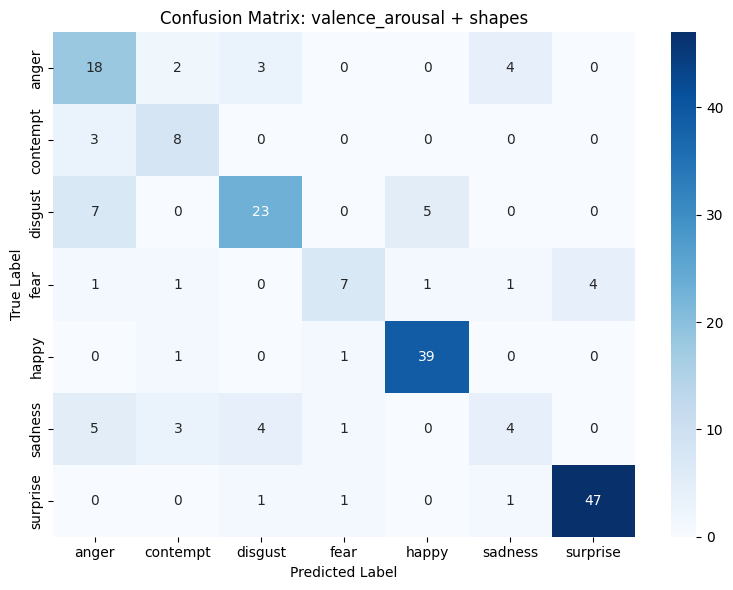


=== Running KNN for combination: VALENCE_AROUSAL + PCA ===
Training Accuracy: 0.9362244897959183
Testing Accuracy: 0.8163265306122449
Classification Report:
               precision    recall  f1-score   support

       anger       0.72      0.67      0.69        27
    contempt       0.73      0.73      0.73        11
     disgust       0.75      0.86      0.80        35
        fear       1.00      0.53      0.70        15
       happy       0.86      0.93      0.89        41
     sadness       0.64      0.53      0.58        17
    surprise       0.91      0.98      0.94        50

    accuracy                           0.82       196
   macro avg       0.80      0.75      0.76       196
weighted avg       0.82      0.82      0.81       196



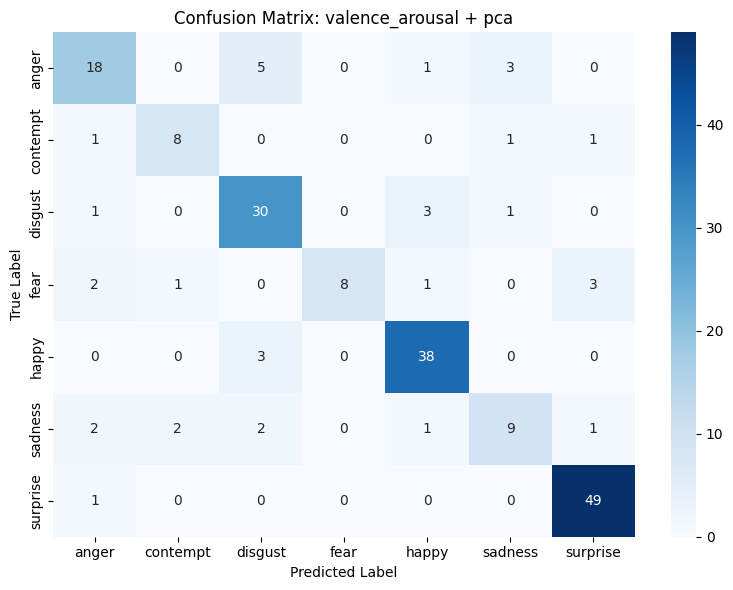


=== Running KNN for combination: VALENCE_AROUSAL + LDA ===
Training Accuracy: 0.9426020408163265
Testing Accuracy: 0.8724489795918368
Classification Report:
               precision    recall  f1-score   support

       anger       0.71      0.74      0.73        27
    contempt       0.89      0.73      0.80        11
     disgust       0.75      0.86      0.80        35
        fear       0.93      0.93      0.93        15
       happy       0.98      0.98      0.98        41
     sadness       0.75      0.71      0.73        17
    surprise       1.00      0.94      0.97        50

    accuracy                           0.87       196
   macro avg       0.86      0.84      0.85       196
weighted avg       0.88      0.87      0.87       196



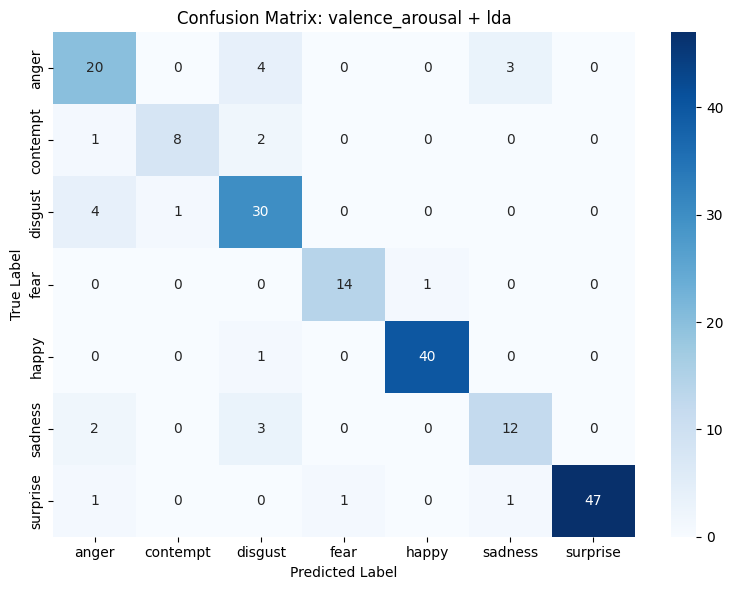


=== Running KNN for combination: SHAPES + PCA ===
Training Accuracy: 0.9298469387755102
Testing Accuracy: 0.7806122448979592
Classification Report:
               precision    recall  f1-score   support

       anger       0.54      0.48      0.51        27
    contempt       0.69      0.82      0.75        11
     disgust       0.69      0.77      0.73        35
        fear       0.91      0.67      0.77        15
       happy       0.86      0.93      0.89        41
     sadness       0.64      0.41      0.50        17
    surprise       0.91      0.98      0.94        50

    accuracy                           0.78       196
   macro avg       0.75      0.72      0.73       196
weighted avg       0.77      0.78      0.77       196



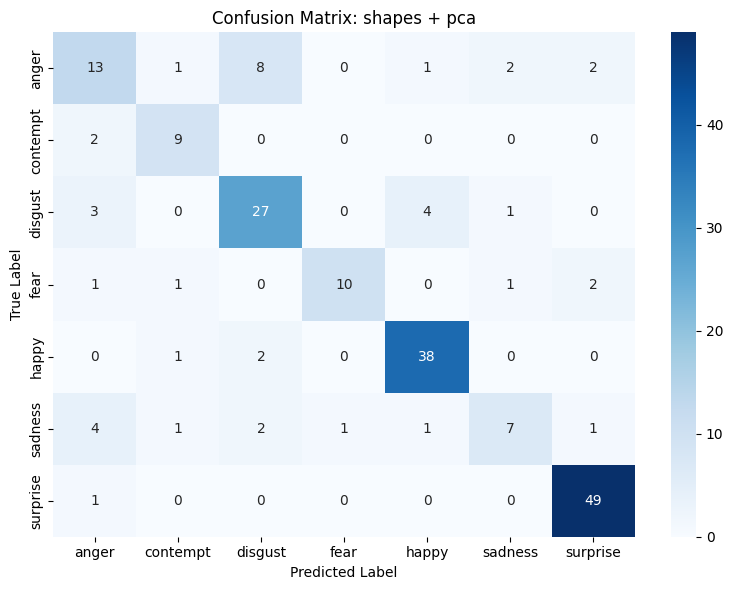


=== Running KNN for combination: SHAPES + LDA ===
Training Accuracy: 0.9336734693877551
Testing Accuracy: 0.7959183673469388
Classification Report:
               precision    recall  f1-score   support

       anger       0.56      0.70      0.62        27
    contempt       0.75      0.82      0.78        11
     disgust       0.82      0.80      0.81        35
        fear       0.75      0.60      0.67        15
       happy       0.93      0.93      0.93        41
     sadness       0.45      0.29      0.36        17
    surprise       0.92      0.96      0.94        50

    accuracy                           0.80       196
   macro avg       0.74      0.73      0.73       196
weighted avg       0.79      0.80      0.79       196



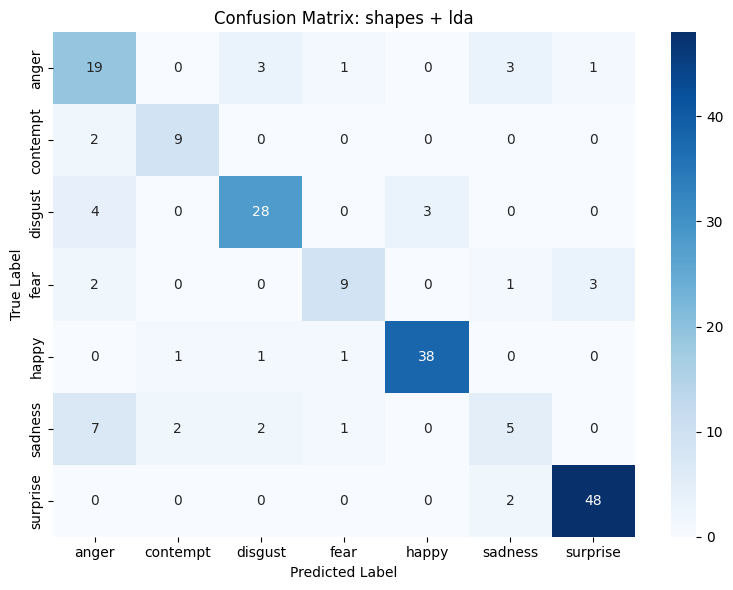


=== Running KNN for combination: PCA + LDA ===
Training Accuracy: 0.9311224489795918
Testing Accuracy: 0.7704081632653061
Classification Report:
               precision    recall  f1-score   support

       anger       0.70      0.52      0.60        27
    contempt       0.58      0.64      0.61        11
     disgust       0.64      0.83      0.72        35
        fear       0.80      0.53      0.64        15
       happy       0.90      0.85      0.88        41
     sadness       0.64      0.53      0.58        17
    surprise       0.88      0.98      0.92        50

    accuracy                           0.77       196
   macro avg       0.73      0.70      0.71       196
weighted avg       0.77      0.77      0.76       196



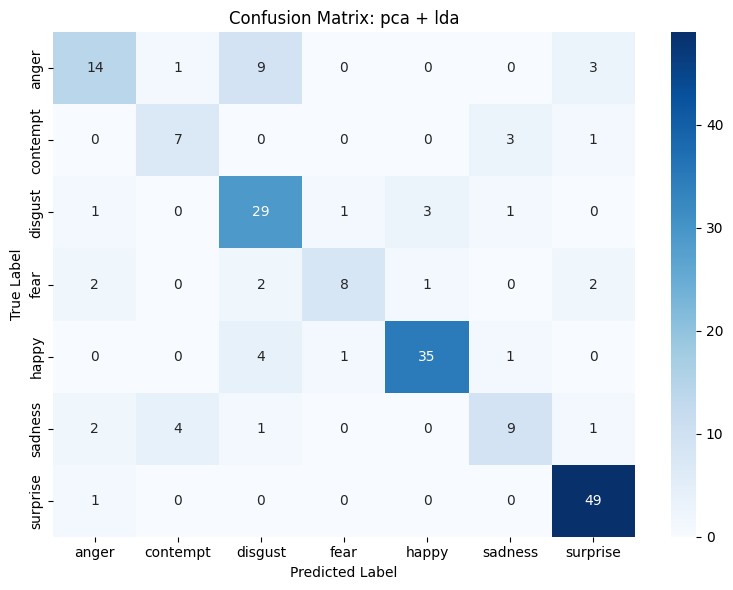


=== Summary of KNN Results for All Combinations ===
        Feature Combination  Training Accuracy  Testing Accuracy
2     valence_arousal + lda           0.942602          0.872449
1     valence_arousal + pca           0.936224          0.816327
4              shapes + lda           0.933673          0.795918
3              shapes + pca           0.929847          0.780612
5                 pca + lda           0.931122          0.770408
0  valence_arousal + shapes           0.927296          0.744898


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Results container ===
results = []

# === Step 3: Loop over all 2-combinations ===
for (name1, name2) in combinations(csv_files.keys(), 2):
    print(f"\n=== Running KNN for combination: {name1.upper()} + {name2.upper()} ===")

    # Load CSVs
    df1 = pd.read_csv(csv_files[name1])
    df2 = pd.read_csv(csv_files[name2])

    # Drop non-feature columns
    non_features = ['image_name', 'filename', 'img_name']
    for col in non_features:
        if col in df1.columns:
            df1 = df1.drop(columns=[col])
        if col in df2.columns:
            df2 = df2.drop(columns=[col])

    # Step: Detect label column
    label_column = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for col in possible_label_names:
        if col in df1.columns:
            label_column = col
            y = df1[col]
            df1 = df1.drop(columns=[col])
            break
        elif col in df2.columns:
            label_column = col
            y = df2[col]
            df2 = df2.drop(columns=[col])
            break

    if label_column is None:
        raise Exception(f"Label column not found! Tried: {possible_label_names}. "
                        f"Available in df1: {df1.columns.tolist()}, df2: {df2.columns.tolist()}")

    # Encode string labels like 'anger', 'happy', etc.
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge feature columns
    X = pd.concat([df1, df2], axis=1)

    # Remove any non-numeric leftover columns
    X = X.select_dtypes(include=[np.number])

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Train model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predict
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f'Confusion Matrix: {name1} + {name2}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Store results
    results.append({
        'Feature Combination': f"{name1} + {name2}",
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# Final summary
print("\n=== Summary of KNN Results for All Combinations ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running SVC for combination: VALENCE_AROUSAL + SHAPES ===
Training Accuracy: 0.9732142857142857
Testing Accuracy: 0.923469387755102
Classification Report:
               precision    recall  f1-score   support

       anger       0.81      0.81      0.81        27
    contempt       0.92      1.00      0.96        11
     disgust       0.91      0.89      0.90        35
        fear       1.00      0.93      0.97        15
       happy       0.93      1.00      0.96        41
     sadness       0.87      0.76      0.81        17
    surprise       0.98      0.98      0.98        50

    accuracy                           0.92       196
   macro avg       0.92      0.91      0.91       196
weighted avg       0.92      0.92      0.92       196



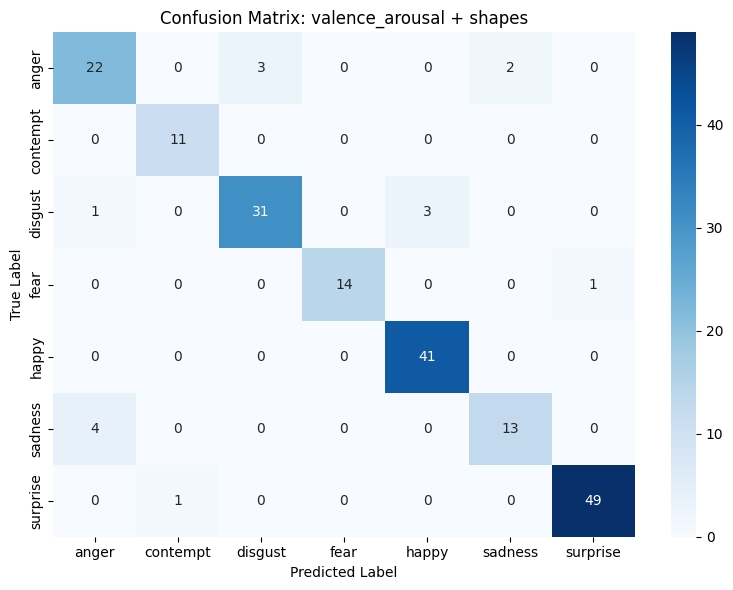


=== Running SVC for combination: VALENCE_AROUSAL + PCA ===
Training Accuracy: 0.9961734693877551
Testing Accuracy: 0.9132653061224489
Classification Report:
               precision    recall  f1-score   support

       anger       0.83      0.70      0.76        27
    contempt       1.00      0.91      0.95        11
     disgust       0.82      0.89      0.85        35
        fear       1.00      0.93      0.97        15
       happy       0.91      1.00      0.95        41
     sadness       0.88      0.82      0.85        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.91       196
   macro avg       0.92      0.89      0.90       196
weighted avg       0.91      0.91      0.91       196



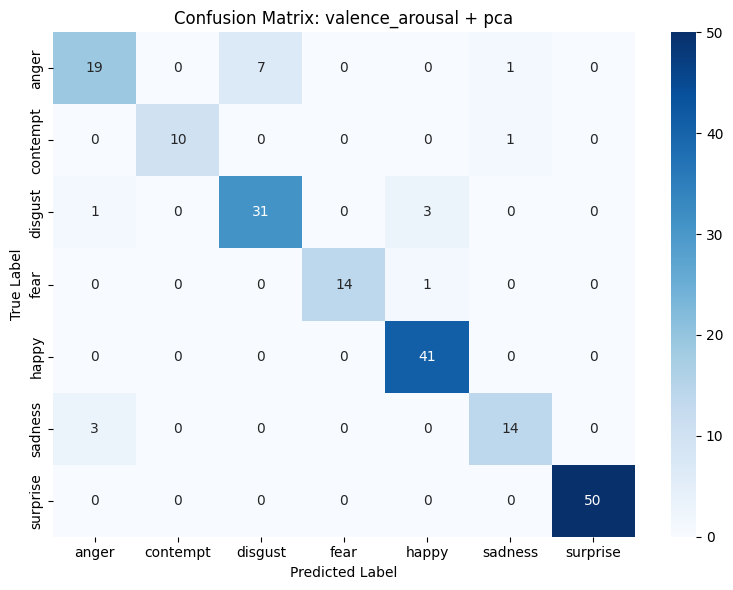


=== Running SVC for combination: VALENCE_AROUSAL + LDA ===
Training Accuracy: 0.9579081632653061
Testing Accuracy: 0.9336734693877551
Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.81      0.83        27
    contempt       1.00      0.91      0.95        11
     disgust       0.94      0.97      0.96        35
        fear       0.93      0.93      0.93        15
       happy       0.98      1.00      0.99        41
     sadness       0.74      0.82      0.78        17
    surprise       1.00      0.96      0.98        50

    accuracy                           0.93       196
   macro avg       0.92      0.92      0.92       196
weighted avg       0.94      0.93      0.93       196



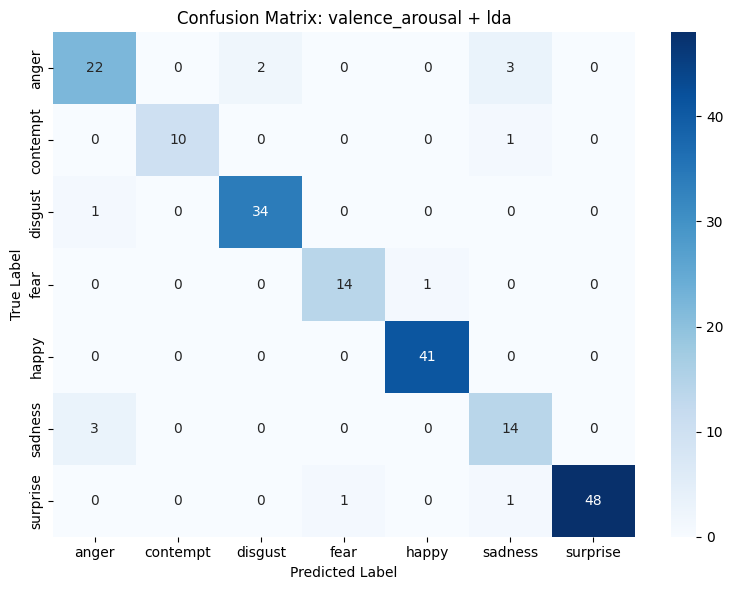


=== Running SVC for combination: SHAPES + PCA ===
Training Accuracy: 0.9923469387755102
Testing Accuracy: 0.9336734693877551
Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.85      0.85        27
    contempt       1.00      0.91      0.95        11
     disgust       0.91      0.89      0.90        35
        fear       1.00      0.93      0.97        15
       happy       0.91      1.00      0.95        41
     sadness       0.88      0.82      0.85        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.93       196
   macro avg       0.94      0.91      0.92       196
weighted avg       0.93      0.93      0.93       196



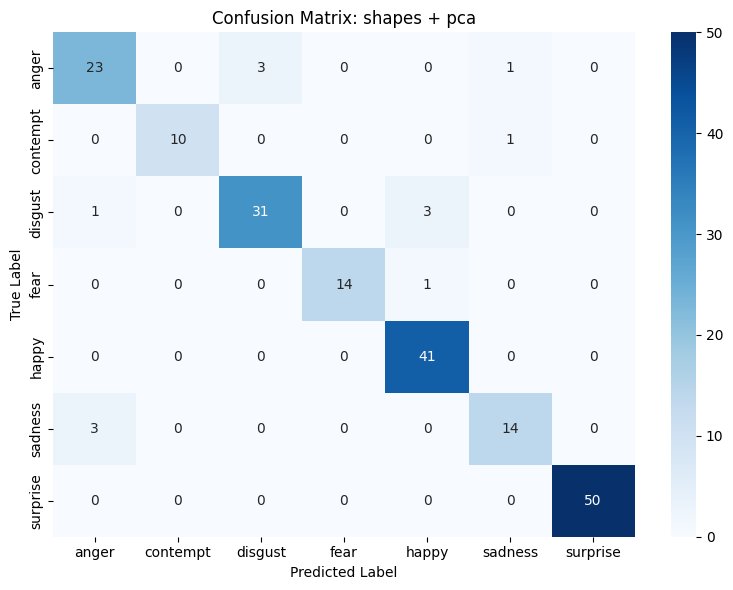


=== Running SVC for combination: SHAPES + LDA ===
Training Accuracy: 0.9770408163265306
Testing Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

       anger       0.82      0.85      0.84        27
    contempt       1.00      1.00      1.00        11
     disgust       0.94      0.89      0.91        35
        fear       1.00      0.87      0.93        15
       happy       0.93      1.00      0.96        41
     sadness       0.82      0.82      0.82        17
    surprise       0.98      0.98      0.98        50

    accuracy                           0.93       196
   macro avg       0.93      0.92      0.92       196
weighted avg       0.93      0.93      0.93       196



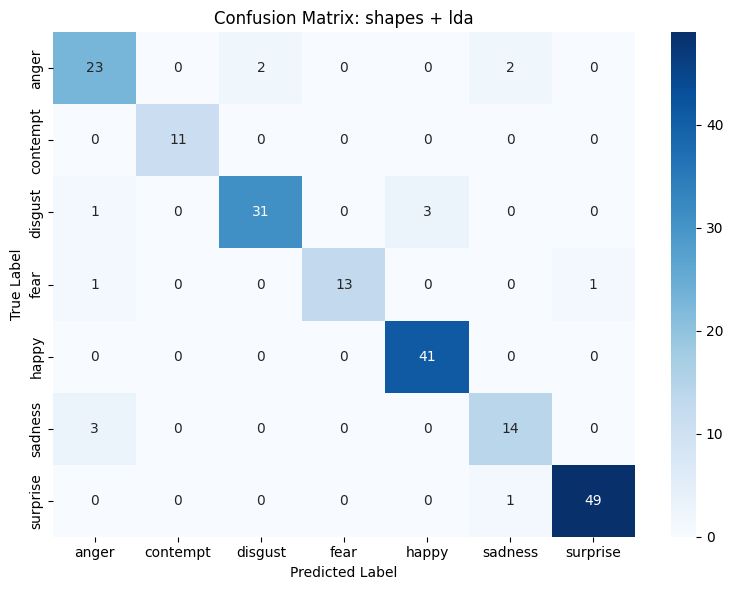


=== Running SVC for combination: PCA + LDA ===
Training Accuracy: 0.9897959183673469
Testing Accuracy: 0.8979591836734694
Classification Report:
               precision    recall  f1-score   support

       anger       0.95      0.70      0.81        27
    contempt       0.77      0.91      0.83        11
     disgust       0.79      0.89      0.84        35
        fear       0.93      0.87      0.90        15
       happy       0.91      1.00      0.95        41
     sadness       0.87      0.76      0.81        17
    surprise       0.98      0.98      0.98        50

    accuracy                           0.90       196
   macro avg       0.89      0.87      0.87       196
weighted avg       0.90      0.90      0.90       196



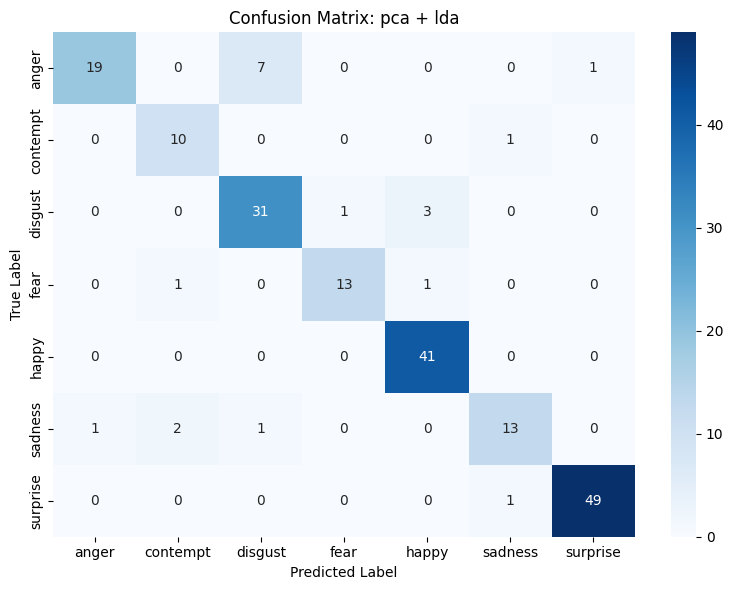


=== Summary of SVC Results for All Combinations ===
        Feature Combination  Training Accuracy  Testing Accuracy
2     valence_arousal + lda           0.957908          0.933673
3              shapes + pca           0.992347          0.933673
4              shapes + lda           0.977041          0.928571
0  valence_arousal + shapes           0.973214          0.923469
1     valence_arousal + pca           0.996173          0.913265
5                 pca + lda           0.989796          0.897959


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Results container ===
results = []

# === Step 3: Loop over all 2-combinations ===
for (name1, name2) in combinations(csv_files.keys(), 2):
    print(f"\n=== Running SVC for combination: {name1.upper()} + {name2.upper()} ===")

    # Load both CSVs
    df1 = pd.read_csv(csv_files[name1])
    df2 = pd.read_csv(csv_files[name2])

    # Drop non-feature columns like image names
    non_features = ['image_name', 'filename', 'img_name']
    for col in non_features:
        if col in df1.columns:
            df1 = df1.drop(columns=[col])
        if col in df2.columns:
            df2 = df2.drop(columns=[col])

    # Step: Detect and extract label column
    label_column = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for col in possible_label_names:
        if col in df1.columns:
            label_column = col
            y = df1[col]
            df1 = df1.drop(columns=[col])
            break
        elif col in df2.columns:
            label_column = col
            y = df2[col]
            df2 = df2.drop(columns=[col])
            break

    if label_column is None:
        raise Exception(f"Label column not found! Tried: {possible_label_names}. "
                        f"Available in df1: {df1.columns.tolist()}, df2: {df2.columns.tolist()}")

    # Encode string labels like 'happy', 'anger', etc.
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge features
    X = pd.concat([df1, df2], axis=1)

    # Ensure only numeric data is used
    X = X.select_dtypes(include=[np.number])

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Train SVC model
    svc = SVC(kernel='rbf', C=1, gamma='scale')  # You can experiment with hyperparams
    svc.fit(X_train, y_train)

    # Predictions
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f'Confusion Matrix: {name1} + {name2}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Save results
    results.append({
        'Feature Combination': f"{name1} + {name2}",
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Final Summary Table ===
print("\n=== Summary of SVC Results for All Combinations ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running Logistic Regression for combination: VALENCE_AROUSAL + SHAPES ===
Training Accuracy: 0.985969387755102
Testing Accuracy: 0.9744897959183674
Classification Report:
               precision    recall  f1-score   support

       anger       0.96      0.93      0.94        27
    contempt       0.85      1.00      0.92        11
     disgust       0.97      1.00      0.99        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       0.94      0.88      0.91        17
    surprise       1.00      0.98      0.99        50

    accuracy                           0.97       196
   macro avg       0.96      0.97      0.96       196
weighted avg       0.98      0.97      0.97       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


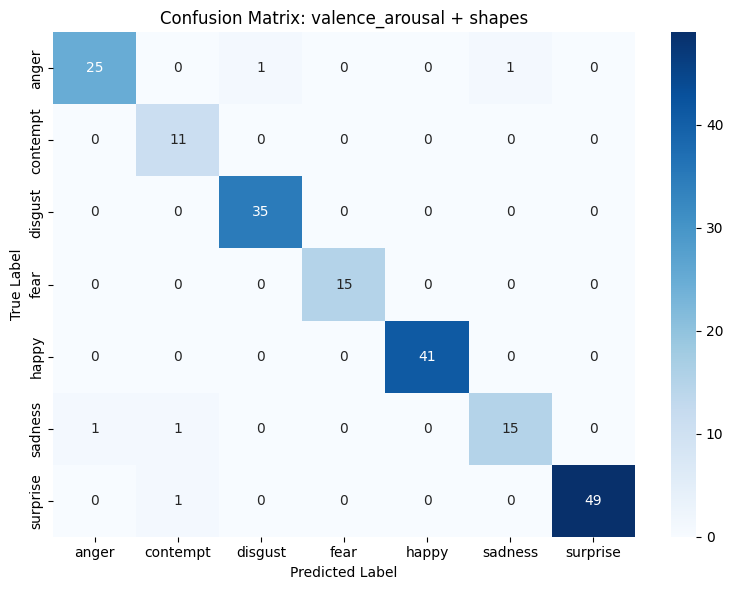


=== Running Logistic Regression for combination: VALENCE_AROUSAL + PCA ===
Training Accuracy: 0.9974489795918368
Testing Accuracy: 0.923469387755102
Classification Report:
               precision    recall  f1-score   support

       anger       0.91      0.74      0.82        27
    contempt       0.79      1.00      0.88        11
     disgust       0.89      0.94      0.92        35
        fear       0.93      0.87      0.90        15
       happy       0.95      1.00      0.98        41
     sadness       0.82      0.82      0.82        17
    surprise       1.00      0.98      0.99        50

    accuracy                           0.92       196
   macro avg       0.90      0.91      0.90       196
weighted avg       0.93      0.92      0.92       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


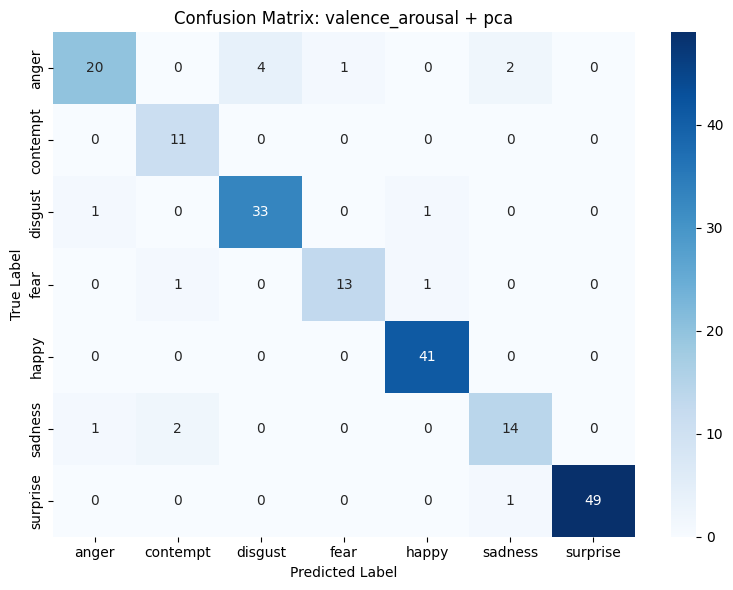


=== Running Logistic Regression for combination: VALENCE_AROUSAL + LDA ===
Training Accuracy: 0.9362244897959183
Testing Accuracy: 0.9438775510204082
Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.85      0.88        27
    contempt       0.83      0.91      0.87        11
     disgust       0.97      1.00      0.99        35
        fear       1.00      0.87      0.93        15
       happy       0.98      1.00      0.99        41
     sadness       0.74      0.82      0.78        17
    surprise       1.00      0.98      0.99        50

    accuracy                           0.94       196
   macro avg       0.92      0.92      0.92       196
weighted avg       0.95      0.94      0.94       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


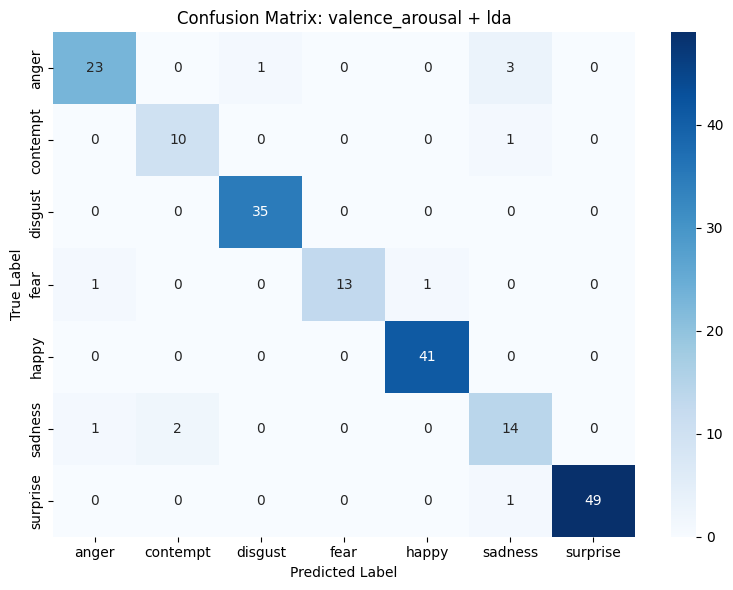


=== Running Logistic Regression for combination: SHAPES + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.96      0.93        27
    contempt       1.00      1.00      1.00        11
     disgust       0.94      0.97      0.96        35
        fear       1.00      0.93      0.97        15
       happy       1.00      1.00      1.00        41
     sadness       0.88      0.88      0.88        17
    surprise       1.00      0.96      0.98        50

    accuracy                           0.96       196
   macro avg       0.96      0.96      0.96       196
weighted avg       0.97      0.96      0.96       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


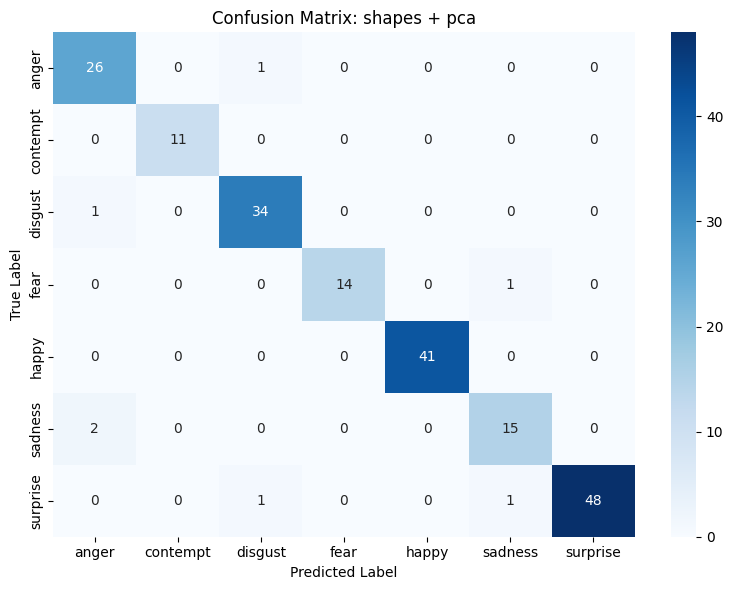


=== Running Logistic Regression for combination: SHAPES + LDA ===
Training Accuracy: 0.9961734693877551
Testing Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.93      0.93        27
    contempt       0.92      1.00      0.96        11
     disgust       0.97      1.00      0.99        35
        fear       1.00      0.93      0.97        15
       happy       1.00      1.00      1.00        41
     sadness       0.83      0.88      0.86        17
    surprise       1.00      0.96      0.98        50

    accuracy                           0.96       196
   macro avg       0.95      0.96      0.95       196
weighted avg       0.97      0.96      0.96       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


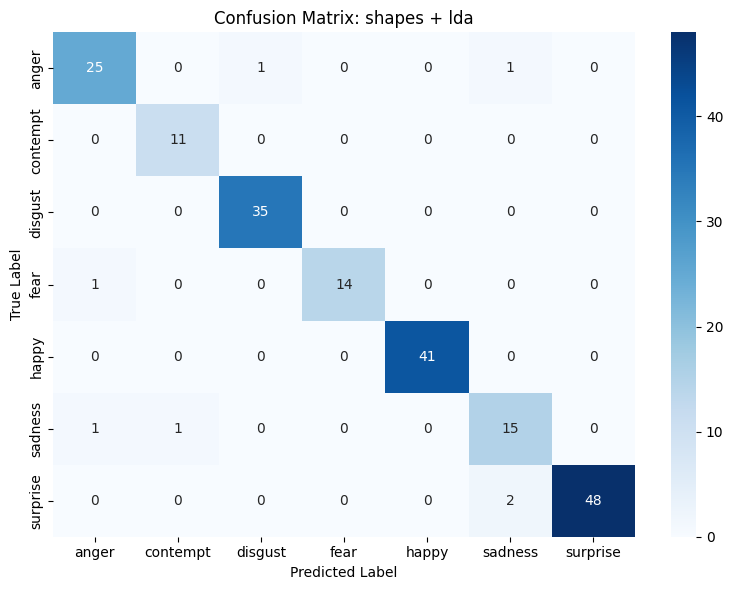


=== Running Logistic Regression for combination: PCA + LDA ===
Training Accuracy: 0.9400510204081632
Testing Accuracy: 0.8010204081632653
Classification Report:
               precision    recall  f1-score   support

       anger       0.75      0.56      0.64        27
    contempt       1.00      0.73      0.84        11
     disgust       0.64      0.71      0.68        35
        fear       0.80      0.53      0.64        15
       happy       0.89      0.98      0.93        41
     sadness       0.75      0.71      0.73        17
    surprise       0.84      0.98      0.91        50

    accuracy                           0.80       196
   macro avg       0.81      0.74      0.77       196
weighted avg       0.80      0.80      0.79       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


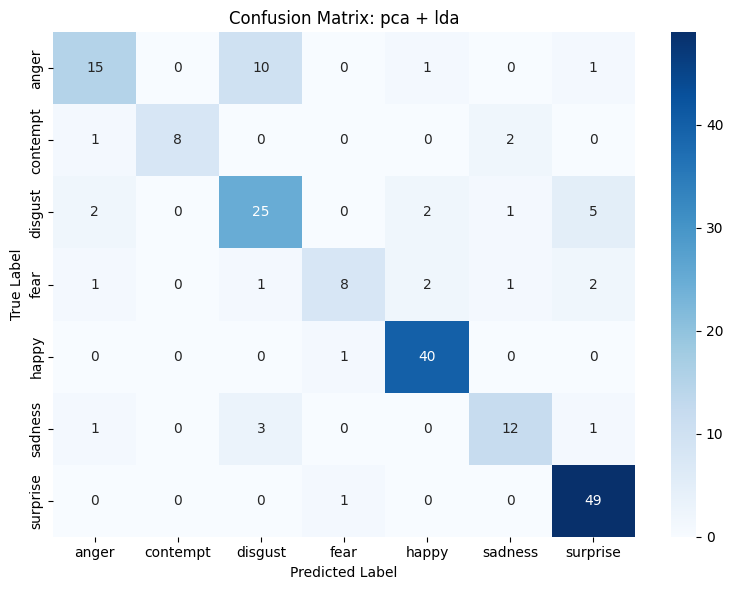


=== Summary of Logistic Regression Results for All Combinations ===
        Feature Combination  Training Accuracy  Testing Accuracy
0  valence_arousal + shapes           0.985969          0.974490
3              shapes + pca           1.000000          0.964286
4              shapes + lda           0.996173          0.964286
2     valence_arousal + lda           0.936224          0.943878
1     valence_arousal + pca           0.997449          0.923469
5                 pca + lda           0.940051          0.801020


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Results container ===
results = []

# === Step 3: Loop over all 2-combinations ===
for (name1, name2) in combinations(csv_files.keys(), 2):
    print(f"\n=== Running Logistic Regression for combination: {name1.upper()} + {name2.upper()} ===")

    # Load both CSVs
    df1 = pd.read_csv(csv_files[name1])
    df2 = pd.read_csv(csv_files[name2])

    # Drop non-feature columns
    non_features = ['image_name', 'filename', 'img_name']
    for col in non_features:
        if col in df1.columns:
            df1 = df1.drop(columns=[col])
        if col in df2.columns:
            df2 = df2.drop(columns=[col])

    # Detect and extract label
    label_column = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for col in possible_label_names:
        if col in df1.columns:
            label_column = col
            y = df1[col]
            df1 = df1.drop(columns=[col])
            break
        elif col in df2.columns:
            label_column = col
            y = df2[col]
            df2 = df2.drop(columns=[col])
            break

    if label_column is None:
        raise Exception(f"Label column not found! Tried: {possible_label_names}. "
                        f"Available in df1: {df1.columns.tolist()}, df2: {df2.columns.tolist()}")

    # Encode labels (happy → 0, sad → 1, etc.)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge and clean features
    X = pd.concat([df1, df2], axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Logistic Regression
    logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    logreg.fit(X_train, y_train)

    # Predict
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f'Confusion Matrix: {name1} + {name2}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Save results
    results.append({
        'Feature Combination': f"{name1} + {name2}",
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Summary Table ===
print("\n=== Summary of Logistic Regression Results for All Combinations ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running Random Forest for: VALENCE_AROUSAL + SHAPES ===
Training Accuracy: 1.0
Testing Accuracy: 0.9540816326530612
Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.96      0.90        27
    contempt       1.00      1.00      1.00        11
     disgust       0.97      0.89      0.93        35
        fear       1.00      1.00      1.00        15
       happy       0.93      1.00      0.96        41
     sadness       1.00      0.76      0.87        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.95       196
   macro avg       0.96      0.94      0.95       196
weighted avg       0.96      0.95      0.95       196



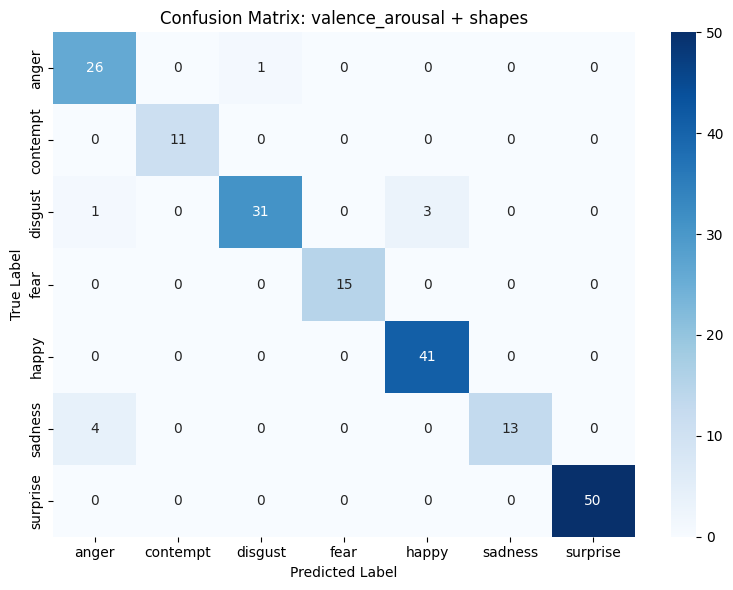


=== Running Random Forest for: VALENCE_AROUSAL + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.923469387755102
Classification Report:
               precision    recall  f1-score   support

       anger       0.82      0.85      0.84        27
    contempt       1.00      0.91      0.95        11
     disgust       0.89      0.89      0.89        35
        fear       1.00      0.80      0.89        15
       happy       0.87      1.00      0.93        41
     sadness       1.00      0.82      0.90        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.92       196
   macro avg       0.94      0.90      0.91       196
weighted avg       0.93      0.92      0.92       196



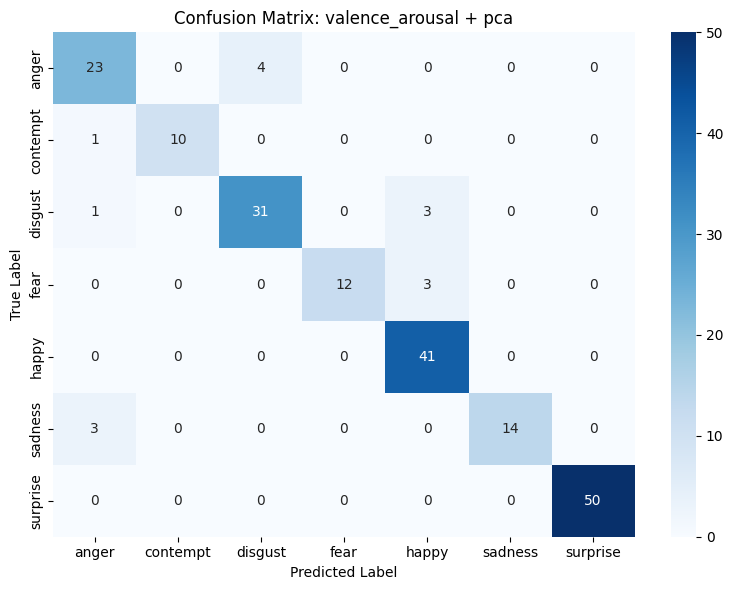


=== Running Random Forest for: VALENCE_AROUSAL + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9693877551020408
Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.93      0.91        27
    contempt       1.00      1.00      1.00        11
     disgust       0.94      0.97      0.96        35
        fear       1.00      0.93      0.97        15
       happy       0.98      1.00      0.99        41
     sadness       1.00      0.88      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       196
   macro avg       0.97      0.96      0.97       196
weighted avg       0.97      0.97      0.97       196



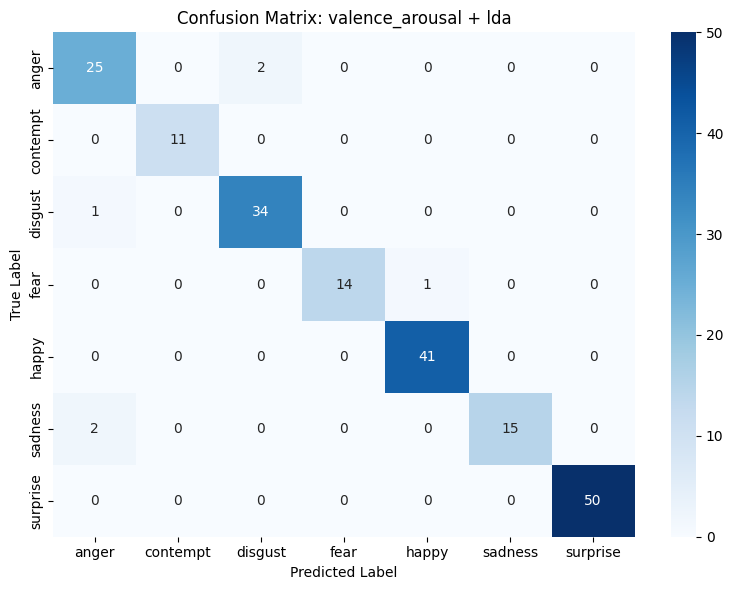


=== Running Random Forest for: SHAPES + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9438775510204082
Classification Report:
               precision    recall  f1-score   support

       anger       0.83      0.89      0.86        27
    contempt       1.00      1.00      1.00        11
     disgust       0.91      0.89      0.90        35
        fear       1.00      1.00      1.00        15
       happy       0.93      1.00      0.96        41
     sadness       1.00      0.76      0.87        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.94       196
   macro avg       0.95      0.93      0.94       196
weighted avg       0.95      0.94      0.94       196



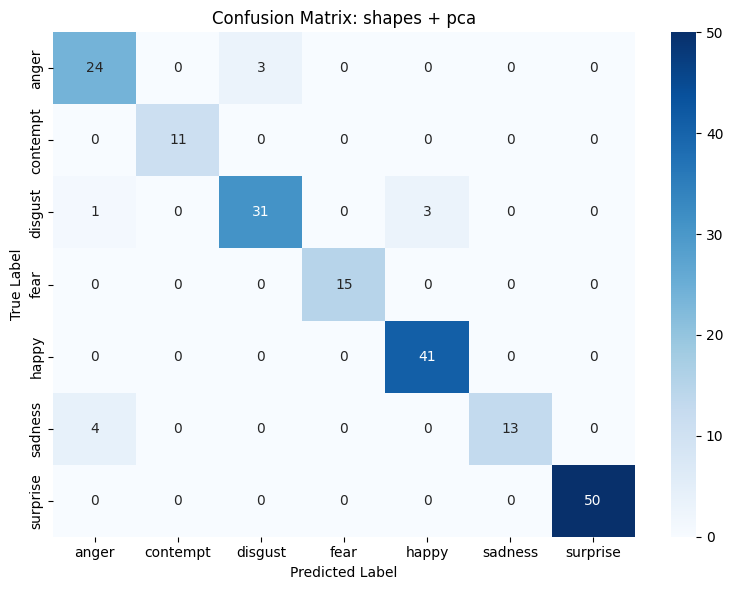


=== Running Random Forest for: SHAPES + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9693877551020408
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.96      0.95        27
    contempt       1.00      1.00      1.00        11
     disgust       0.97      0.89      0.93        35
        fear       1.00      1.00      1.00        15
       happy       0.93      1.00      0.96        41
     sadness       1.00      0.94      0.97        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       196
   macro avg       0.98      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



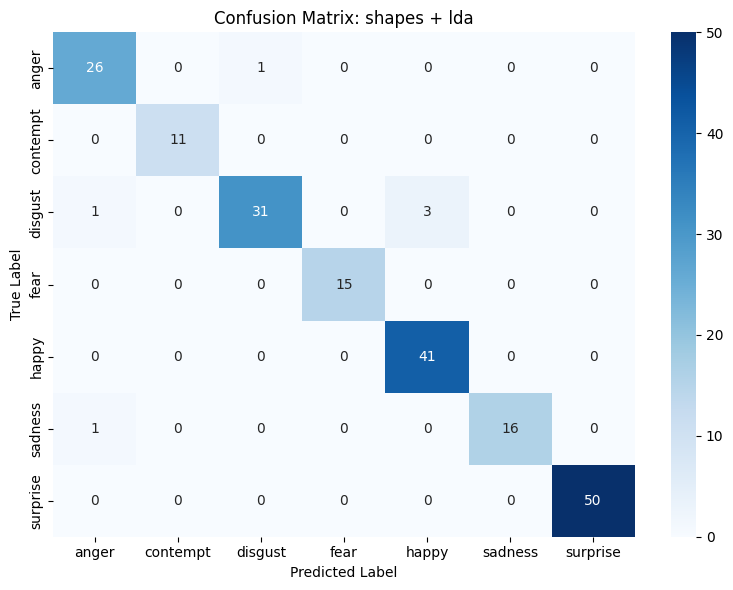


=== Running Random Forest for: PCA + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.8979591836734694
Classification Report:
               precision    recall  f1-score   support

       anger       0.95      0.70      0.81        27
    contempt       0.85      1.00      0.92        11
     disgust       0.74      0.91      0.82        35
        fear       0.92      0.73      0.81        15
       happy       0.95      1.00      0.98        41
     sadness       1.00      0.71      0.83        17
    surprise       0.94      1.00      0.97        50

    accuracy                           0.90       196
   macro avg       0.91      0.87      0.88       196
weighted avg       0.91      0.90      0.90       196



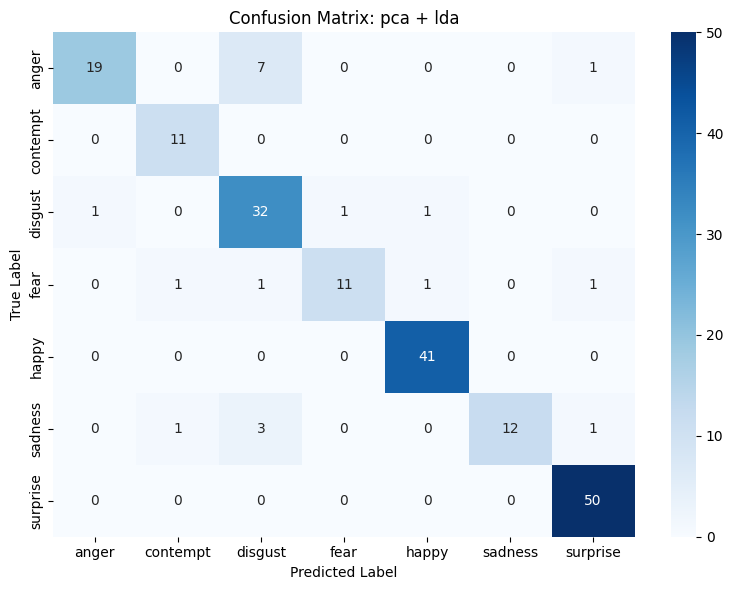


=== Summary of Random Forest Results ===
        Feature Combination  Training Accuracy  Testing Accuracy
2     valence_arousal + lda                1.0          0.969388
4              shapes + lda                1.0          0.969388
0  valence_arousal + shapes                1.0          0.954082
3              shapes + pca                1.0          0.943878
1     valence_arousal + pca                1.0          0.923469
5                 pca + lda                1.0          0.897959


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Store all results here ===
results = []

# === Step 3: Try all 2-combinations ===
for name1, name2 in combinations(csv_files.keys(), 2):
    print(f"\n=== Running Random Forest for: {name1.upper()} + {name2.upper()} ===")

    # Load both feature sets
    df1 = pd.read_csv(csv_files[name1])
    df2 = pd.read_csv(csv_files[name2])

    # Drop non-feature columns
    drop_cols = ['image_name', 'filename', 'img_name']
    for col in drop_cols:
        if col in df1.columns:
            df1 = df1.drop(columns=[col])
        if col in df2.columns:
            df2 = df2.drop(columns=[col])

    # Detect and extract labels
    label_column = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for col in possible_label_names:
        if col in df1.columns:
            y = df1[col]
            df1 = df1.drop(columns=[col])
            label_column = col
            break
        elif col in df2.columns:
            y = df2[col]
            df2 = df2.drop(columns=[col])
            label_column = col
            break

    if label_column is None:
        raise Exception(f"Label not found. Tried: {possible_label_names}")

    # Encode labels (e.g., happy → 0)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Combine features and keep only numeric columns
    X = pd.concat([df1, df2], axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f'Confusion Matrix: {name1} + {name2}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Save result
    results.append({
        'Feature Combination': f"{name1} + {name2}",
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Summary Table ===
print("\n=== Summary of Random Forest Results ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running MLP for: VALENCE_AROUSAL + SHAPES ===
Training Accuracy: 1.0
Testing Accuracy: 0.9897959183673469
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      1.00      0.96        27
    contempt       1.00      1.00      1.00        11
     disgust       1.00      0.97      0.99        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       1.00      0.94      0.97        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196



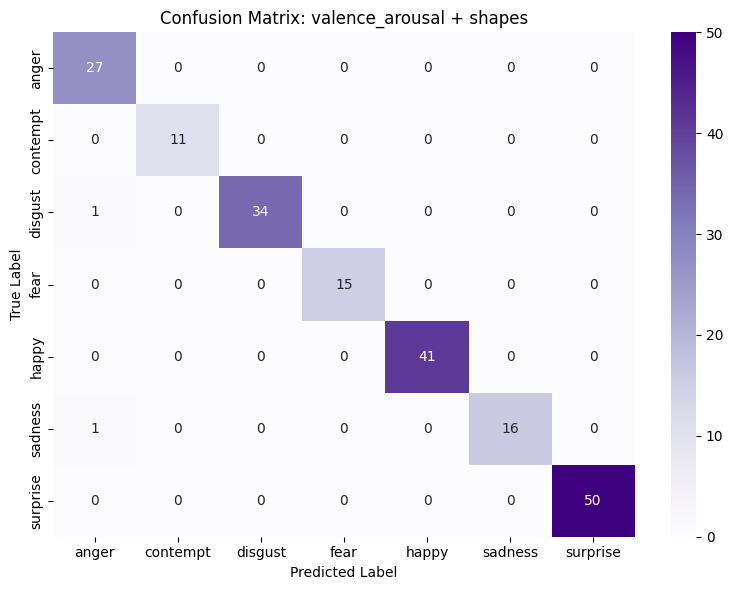


=== Running MLP for: VALENCE_AROUSAL + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9183673469387755
Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.81      0.85        27
    contempt       0.91      0.91      0.91        11
     disgust       0.86      0.89      0.87        35
        fear       0.92      0.73      0.81        15
       happy       0.91      1.00      0.95        41
     sadness       0.88      0.88      0.88        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.92       196
   macro avg       0.91      0.89      0.90       196
weighted avg       0.92      0.92      0.92       196



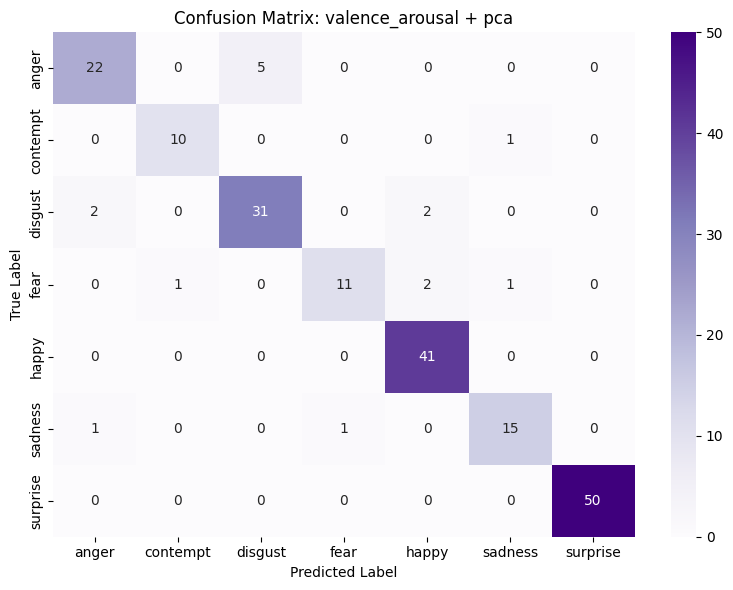


=== Running MLP for: VALENCE_AROUSAL + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9744897959183674
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.93      0.93        27
    contempt       1.00      1.00      1.00        11
     disgust       1.00      0.97      0.99        35
        fear       1.00      0.93      0.97        15
       happy       0.98      1.00      0.99        41
     sadness       0.89      0.94      0.91        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.98      0.97      0.97       196



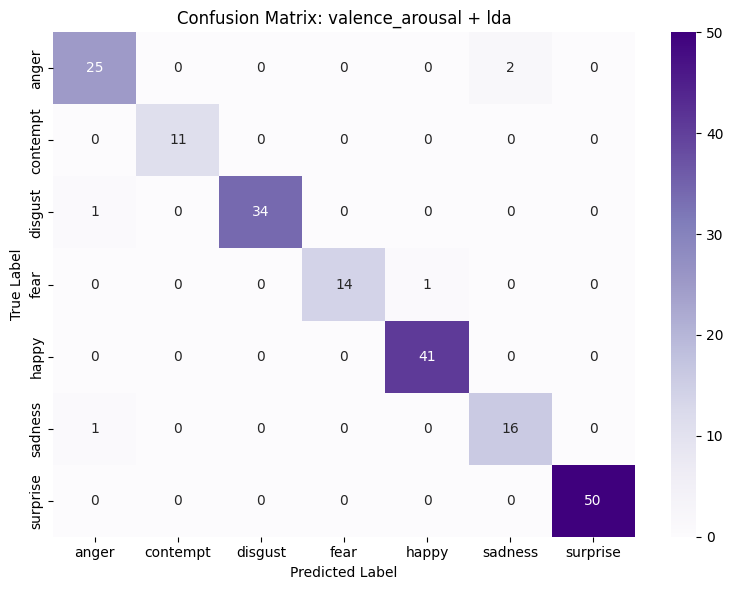


=== Running MLP for: SHAPES + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.93      0.93        27
    contempt       1.00      1.00      1.00        11
     disgust       0.97      1.00      0.99        35
        fear       1.00      0.80      0.89        15
       happy       0.98      1.00      0.99        41
     sadness       0.83      0.88      0.86        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.96       196
   macro avg       0.96      0.94      0.95       196
weighted avg       0.97      0.96      0.96       196



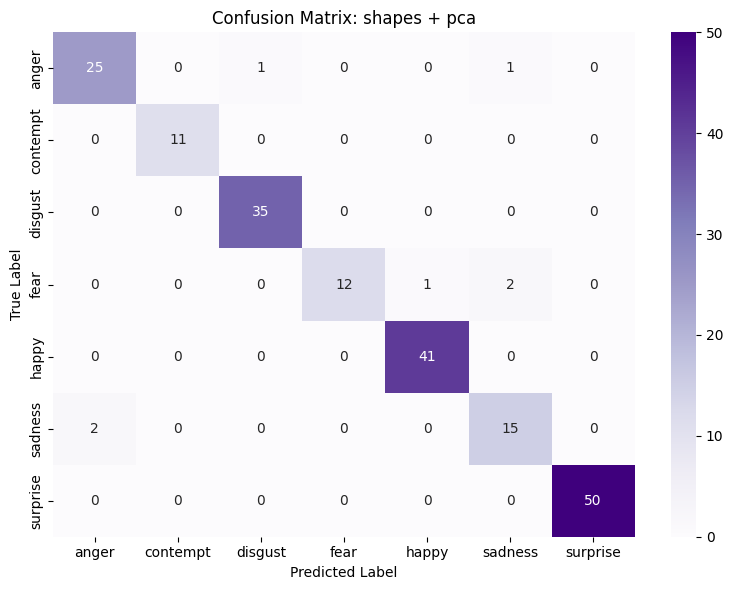


=== Running MLP for: SHAPES + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9897959183673469
Classification Report:
               precision    recall  f1-score   support

       anger       0.96      0.96      0.96        27
    contempt       1.00      1.00      1.00        11
     disgust       1.00      1.00      1.00        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       0.94      0.94      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196



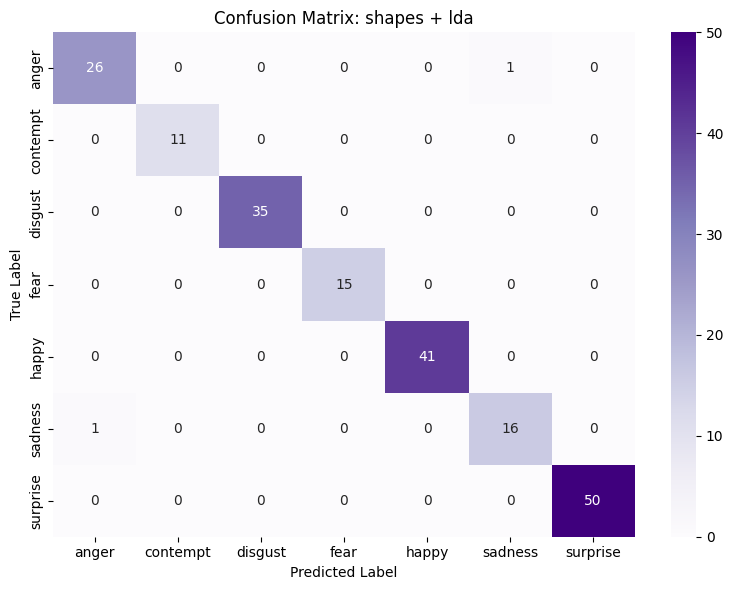


=== Running MLP for: PCA + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.8979591836734694
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      0.74      0.85        27
    contempt       0.85      1.00      0.92        11
     disgust       0.83      0.83      0.83        35
        fear       0.87      0.87      0.87        15
       happy       0.95      1.00      0.98        41
     sadness       0.88      0.82      0.85        17
    surprise       0.89      0.96      0.92        50

    accuracy                           0.90       196
   macro avg       0.89      0.89      0.89       196
weighted avg       0.90      0.90      0.90       196



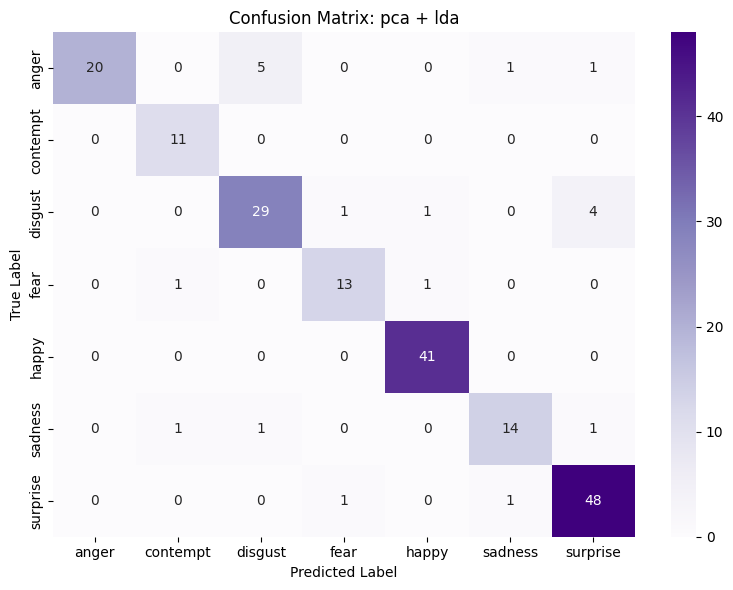


=== Summary of MLP (Neural Network) Results ===
        Feature Combination  Training Accuracy  Testing Accuracy
0  valence_arousal + shapes                1.0          0.989796
4              shapes + lda                1.0          0.989796
2     valence_arousal + lda                1.0          0.974490
3              shapes + pca                1.0          0.964286
1     valence_arousal + pca                1.0          0.918367
5                 pca + lda                1.0          0.897959


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Store results ===
results = []

# === Step 3: Try all 2-feature combinations ===
for name1, name2 in combinations(csv_files.keys(), 2):
    print(f"\n=== Running MLP for: {name1.upper()} + {name2.upper()} ===")

    # Load both feature sets
    df1 = pd.read_csv(csv_files[name1])
    df2 = pd.read_csv(csv_files[name2])

    # Drop non-feature columns
    drop_cols = ['image_name', 'filename', 'img_name']
    for col in drop_cols:
        if col in df1.columns:
            df1 = df1.drop(columns=[col])
        if col in df2.columns:
            df2 = df2.drop(columns=[col])

    # Detect and extract labels
    label_column = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for col in possible_label_names:
        if col in df1.columns:
            y = df1[col]
            df1 = df1.drop(columns=[col])
            label_column = col
            break
        elif col in df2.columns:
            y = df2[col]
            df2 = df2.drop(columns=[col])
            label_column = col
            break

    if label_column is None:
        raise Exception(f"Label column not found. Tried: {possible_label_names}")

    # Encode emotion labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge and select numeric features
    X = pd.concat([df1, df2], axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Train MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64),  # You can tune this
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    mlp.fit(X_train, y_train)

    # Predict
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Purples')
    plt.title(f'Confusion Matrix: {name1} + {name2}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Save result
    results.append({
        'Feature Combination': f"{name1} + {name2}",
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Final Summary Table ===
print("\n=== Summary of MLP (Neural Network) Results ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))


**          COMBINING 3 FEATURES OUT OF 4          **


=== Running KNN for combination: VALENCE_AROUSAL + SHAPES + PCA ===
Training Accuracy: 0.9336734693877551
Testing Accuracy: 0.7908163265306123
Classification Report:
               precision    recall  f1-score   support

       anger       0.60      0.56      0.58        27
    contempt       0.69      0.82      0.75        11
     disgust       0.72      0.80      0.76        35
        fear       0.91      0.67      0.77        15
       happy       0.89      0.95      0.92        41
     sadness       0.50      0.35      0.41        17
    surprise       0.92      0.96      0.94        50

    accuracy                           0.79       196
   macro avg       0.75      0.73      0.73       196
weighted avg       0.78      0.79      0.78       196



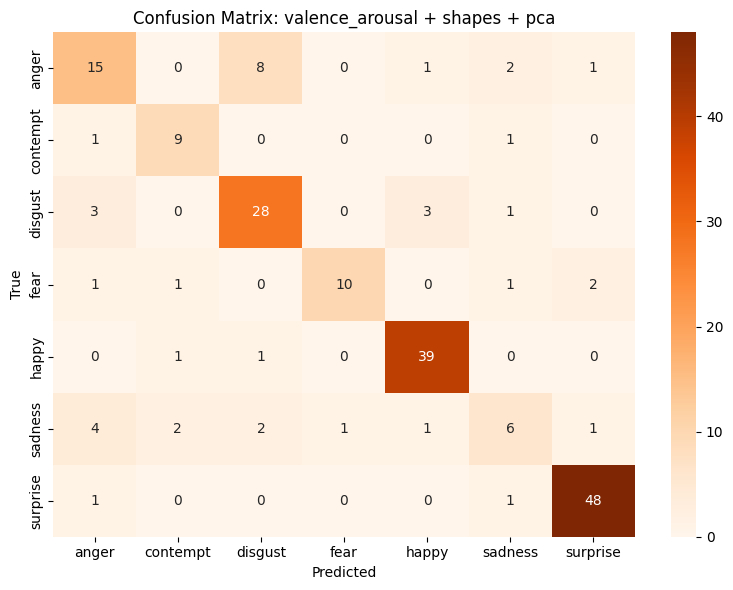


=== Running KNN for combination: VALENCE_AROUSAL + SHAPES + LDA ===
Training Accuracy: 0.9362244897959183
Testing Accuracy: 0.7755102040816326
Classification Report:
               precision    recall  f1-score   support

       anger       0.51      0.70      0.59        27
    contempt       0.64      0.64      0.64        11
     disgust       0.76      0.71      0.74        35
        fear       0.90      0.60      0.72        15
       happy       0.93      0.95      0.94        41
     sadness       0.45      0.29      0.36        17
    surprise       0.92      0.96      0.94        50

    accuracy                           0.78       196
   macro avg       0.73      0.69      0.70       196
weighted avg       0.78      0.78      0.77       196



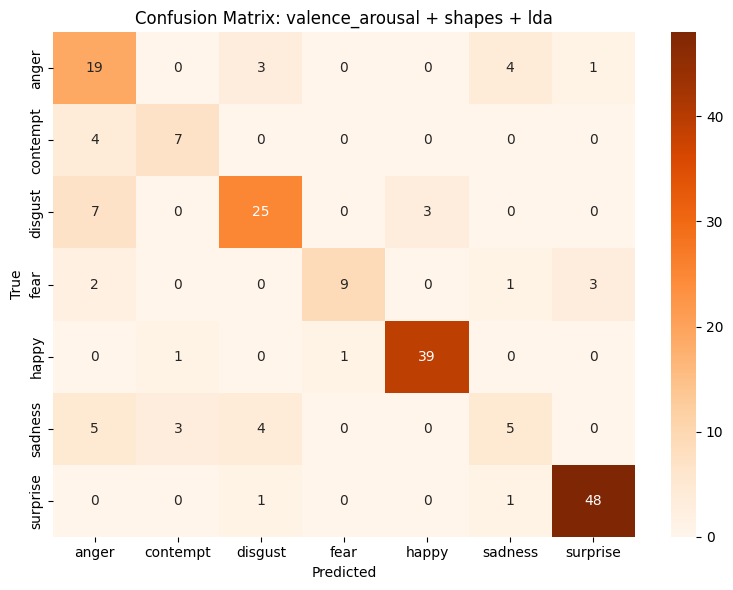


=== Running KNN for combination: VALENCE_AROUSAL + PCA + LDA ===
Training Accuracy: 0.9375
Testing Accuracy: 0.8163265306122449
Classification Report:
               precision    recall  f1-score   support

       anger       0.71      0.63      0.67        27
    contempt       0.69      0.82      0.75        11
     disgust       0.76      0.83      0.79        35
        fear       1.00      0.53      0.70        15
       happy       0.87      0.98      0.92        41
     sadness       0.57      0.47      0.52        17
    surprise       0.92      0.98      0.95        50

    accuracy                           0.82       196
   macro avg       0.79      0.75      0.76       196
weighted avg       0.82      0.82      0.81       196



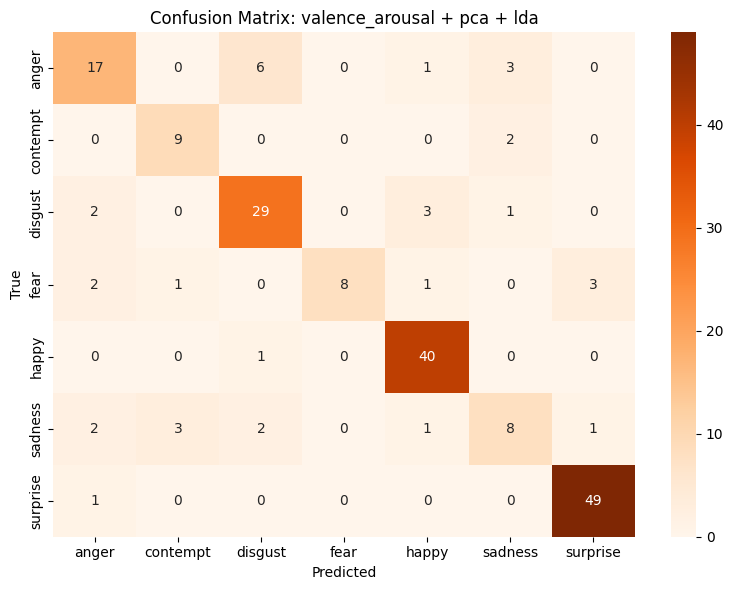


=== Running KNN for combination: SHAPES + PCA + LDA ===
Training Accuracy: 0.9387755102040817
Testing Accuracy: 0.8112244897959183
Classification Report:
               precision    recall  f1-score   support

       anger       0.58      0.56      0.57        27
    contempt       0.69      0.82      0.75        11
     disgust       0.76      0.80      0.78        35
        fear       0.91      0.67      0.77        15
       happy       0.91      0.95      0.93        41
     sadness       0.75      0.53      0.62        17
    surprise       0.91      0.98      0.94        50

    accuracy                           0.81       196
   macro avg       0.79      0.76      0.76       196
weighted avg       0.81      0.81      0.81       196



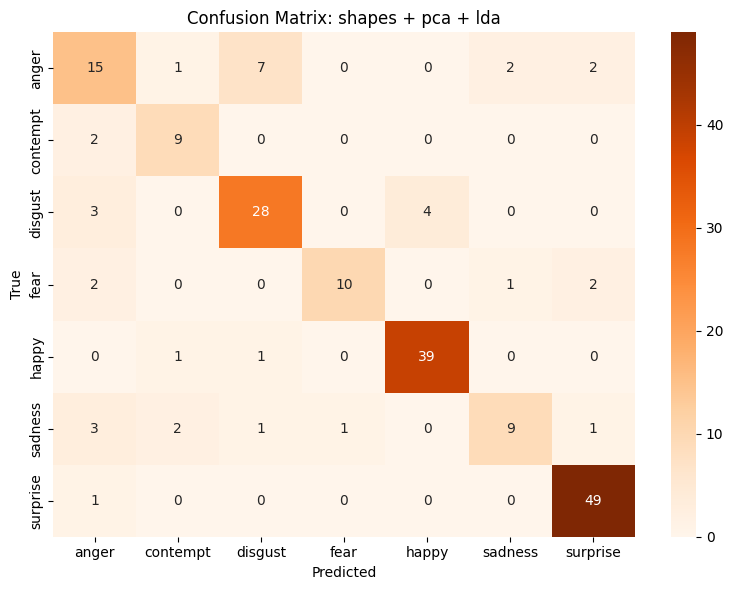


=== Summary of KNN with 3 Feature Sets ===
              Feature Combination  Training Accuracy  Testing Accuracy
2     valence_arousal + pca + lda           0.937500          0.816327
3              shapes + pca + lda           0.938776          0.811224
0  valence_arousal + shapes + pca           0.933673          0.790816
1  valence_arousal + shapes + lda           0.936224          0.775510


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Store results ===
results = []

# === Step 3: Loop over all 3-feature combinations ===
for name_combo in combinations(csv_files.keys(), 3):
    combo_name = ' + '.join(name_combo)
    print(f"\n=== Running KNN for combination: {combo_name.upper()} ===")

    # Load the three CSV files
    dfs = [pd.read_csv(csv_files[name]) for name in name_combo]

    # Clean unnecessary columns
    drop_cols = ['image_name', 'filename', 'img_name']
    for i in range(len(dfs)):
        for col in drop_cols:
            if col in dfs[i].columns:
                dfs[i] = dfs[i].drop(columns=[col])

    # Find and extract label column
    label_column = None
    y = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for df in dfs:
        for col in possible_label_names:
            if col in df.columns:
                y = df[col]
                df.drop(columns=[col], inplace=True)
                label_column = col
                break
        if y is not None:
            break

    if y is None:
        raise Exception(f"Label column not found in any of the files! Tried: {possible_label_names}")

    # Label encode emotion labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge all feature sets and keep only numeric columns
    X = pd.concat(dfs, axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predict
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Oranges')
    plt.title(f'Confusion Matrix: {combo_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Save result
    results.append({
        'Feature Combination': combo_name,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Summary Table ===
print("\n=== Summary of KNN with 3 Feature Sets ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running SVC for combination: VALENCE_AROUSAL + SHAPES + PCA ===
Training Accuracy: 0.9923469387755102
Testing Accuracy: 0.9336734693877551
Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.85      0.85        27
    contempt       1.00      0.91      0.95        11
     disgust       0.91      0.89      0.90        35
        fear       1.00      0.93      0.97        15
       happy       0.91      1.00      0.95        41
     sadness       0.88      0.82      0.85        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.93       196
   macro avg       0.94      0.91      0.92       196
weighted avg       0.93      0.93      0.93       196



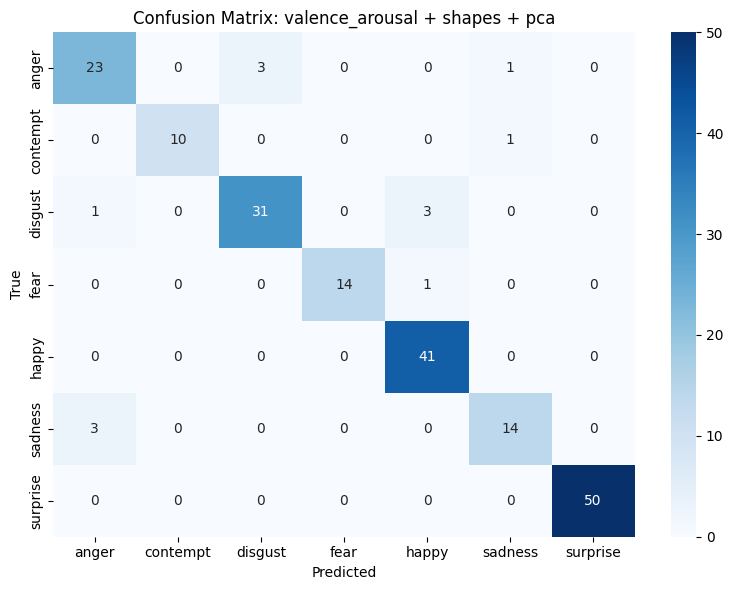


=== Running SVC for combination: VALENCE_AROUSAL + SHAPES + LDA ===
Training Accuracy: 0.9757653061224489
Testing Accuracy: 0.9336734693877551
Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.81      0.83        27
    contempt       1.00      1.00      1.00        11
     disgust       0.91      0.91      0.91        35
        fear       1.00      0.93      0.97        15
       happy       0.95      1.00      0.98        41
     sadness       0.82      0.82      0.82        17
    surprise       0.98      0.98      0.98        50

    accuracy                           0.93       196
   macro avg       0.93      0.92      0.93       196
weighted avg       0.93      0.93      0.93       196



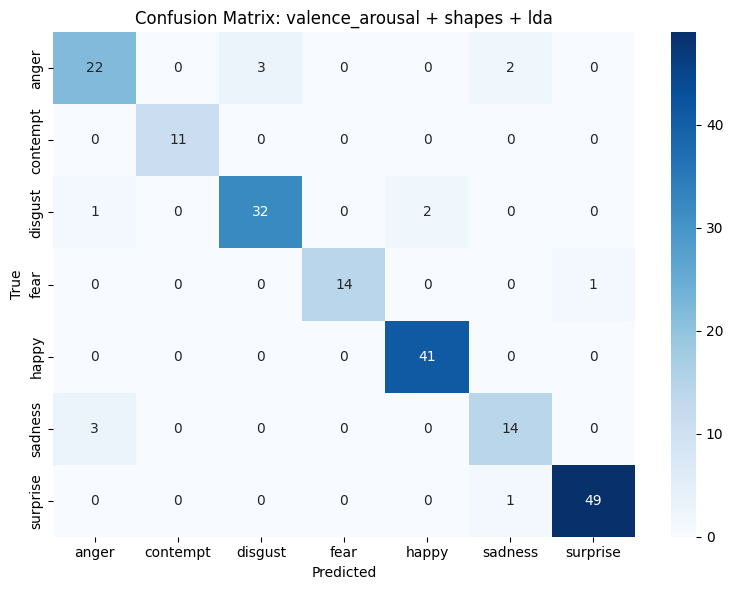


=== Running SVC for combination: VALENCE_AROUSAL + PCA + LDA ===
Training Accuracy: 0.9948979591836735
Testing Accuracy: 0.923469387755102
Classification Report:
               precision    recall  f1-score   support

       anger       0.83      0.74      0.78        27
    contempt       1.00      0.91      0.95        11
     disgust       0.84      0.91      0.88        35
        fear       1.00      0.93      0.97        15
       happy       0.93      1.00      0.96        41
     sadness       0.88      0.82      0.85        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.92       196
   macro avg       0.93      0.90      0.91       196
weighted avg       0.92      0.92      0.92       196



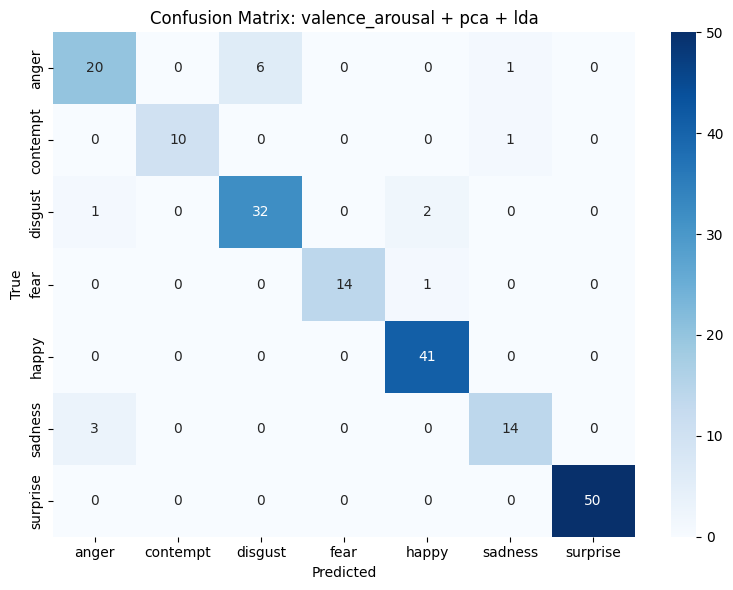


=== Running SVC for combination: SHAPES + PCA + LDA ===
Training Accuracy: 0.9923469387755102
Testing Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.81      0.83        27
    contempt       1.00      0.91      0.95        11
     disgust       0.89      0.89      0.89        35
        fear       1.00      0.93      0.97        15
       happy       0.91      1.00      0.95        41
     sadness       0.88      0.82      0.85        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.93       196
   macro avg       0.93      0.91      0.92       196
weighted avg       0.93      0.93      0.93       196



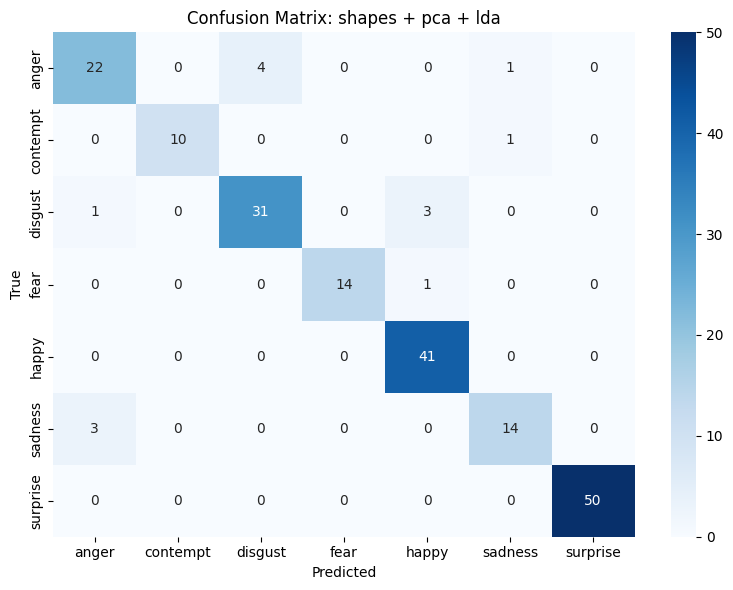


=== Summary of SVC with 3 Feature Sets ===
              Feature Combination  Training Accuracy  Testing Accuracy
0  valence_arousal + shapes + pca           0.992347          0.933673
1  valence_arousal + shapes + lda           0.975765          0.933673
3              shapes + pca + lda           0.992347          0.928571
2     valence_arousal + pca + lda           0.994898          0.923469


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Store results ===
results = []

# === Step 3: Loop through all 3-feature combinations ===
for name_combo in combinations(csv_files.keys(), 3):
    combo_name = ' + '.join(name_combo)
    print(f"\n=== Running SVC for combination: {combo_name.upper()} ===")

    # Load selected 3 CSVs
    dfs = [pd.read_csv(csv_files[name]) for name in name_combo]

    # Drop irrelevant columns
    drop_cols = ['image_name', 'filename', 'img_name']
    for i in range(len(dfs)):
        for col in drop_cols:
            if col in dfs[i].columns:
                dfs[i] = dfs[i].drop(columns=[col])

    # Find and encode labels
    label_column = None
    y = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for df in dfs:
        for col in possible_label_names:
            if col in df.columns:
                y = df[col]
                df.drop(columns=[col], inplace=True)
                label_column = col
                break
        if y is not None:
            break

    if y is None:
        raise Exception(f"Label column not found. Tried: {possible_label_names}")

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge and clean feature set
    X = pd.concat(dfs, axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # SVC model
    svc = SVC(kernel='rbf', C=1.0, gamma='scale')
    svc.fit(X_train, y_train)

    # Predictions
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f'Confusion Matrix: {combo_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Store result
    results.append({
        'Feature Combination': combo_name,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Summary Table ===
print("\n=== Summary of SVC with 3 Feature Sets ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running Logistic Regression for combination: VALENCE_AROUSAL + SHAPES + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9795918367346939
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.96      0.95        27
    contempt       0.92      1.00      0.96        11
     disgust       0.97      0.97      0.97        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       1.00      0.88      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.98       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.98      0.98      0.98       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


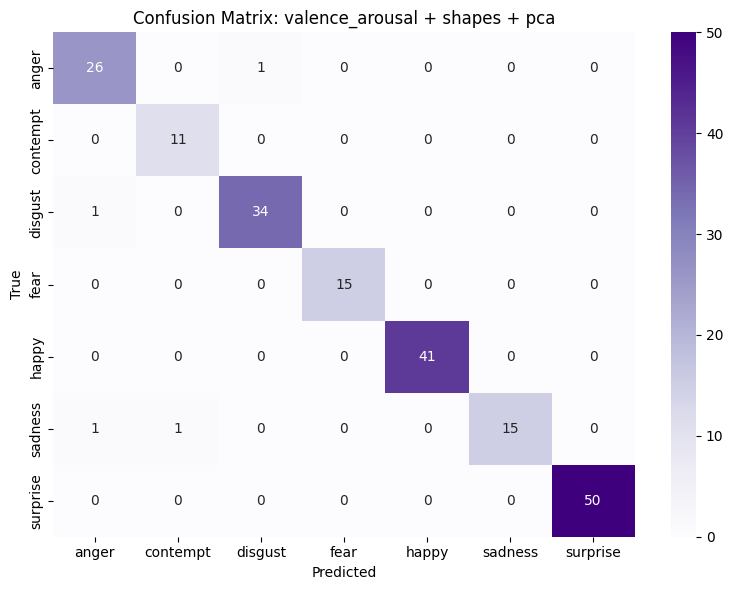


=== Running Logistic Regression for combination: VALENCE_AROUSAL + SHAPES + LDA ===
Training Accuracy: 0.9948979591836735
Testing Accuracy: 0.9897959183673469
Classification Report:
               precision    recall  f1-score   support

       anger       0.96      1.00      0.98        27
    contempt       0.92      1.00      0.96        11
     disgust       1.00      1.00      1.00        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       1.00      0.88      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.99       196
   macro avg       0.98      0.98      0.98       196
weighted avg       0.99      0.99      0.99       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


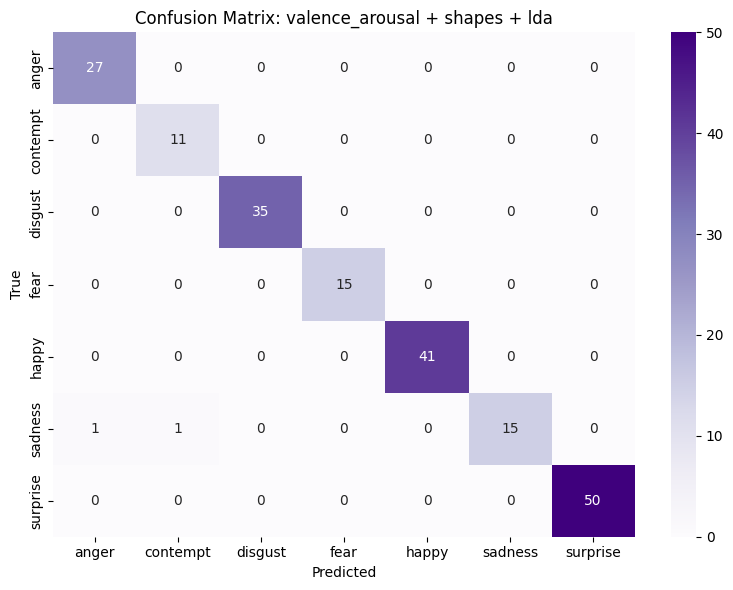


=== Running Logistic Regression for combination: VALENCE_AROUSAL + PCA + LDA ===
Training Accuracy: 0.9974489795918368
Testing Accuracy: 0.9132653061224489
Classification Report:
               precision    recall  f1-score   support

       anger       0.91      0.74      0.82        27
    contempt       0.79      1.00      0.88        11
     disgust       0.86      0.91      0.89        35
        fear       1.00      0.80      0.89        15
       happy       0.93      1.00      0.96        41
     sadness       0.78      0.82      0.80        17
    surprise       1.00      0.98      0.99        50

    accuracy                           0.91       196
   macro avg       0.90      0.89      0.89       196
weighted avg       0.92      0.91      0.91       196



c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


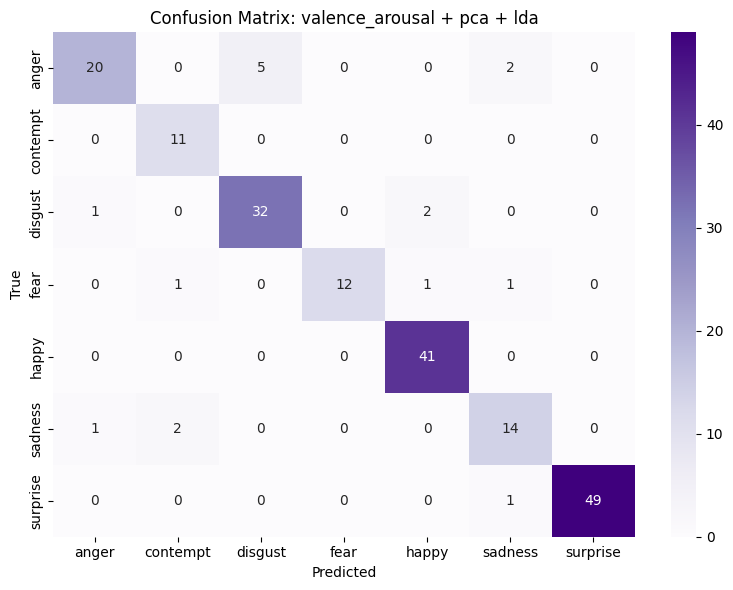

c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Running Logistic Regression for combination: SHAPES + PCA + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9591836734693877
Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.93      0.91        27
    contempt       1.00      1.00      1.00        11
     disgust       0.92      0.97      0.94        35
        fear       1.00      0.93      0.97        15
       happy       1.00      1.00      1.00        41
     sadness       0.88      0.88      0.88        17
    surprise       1.00      0.96      0.98        50

    accuracy                           0.96       196
   macro avg       0.96      0.95      0.95       196
weighted avg       0.96      0.96      0.96       196



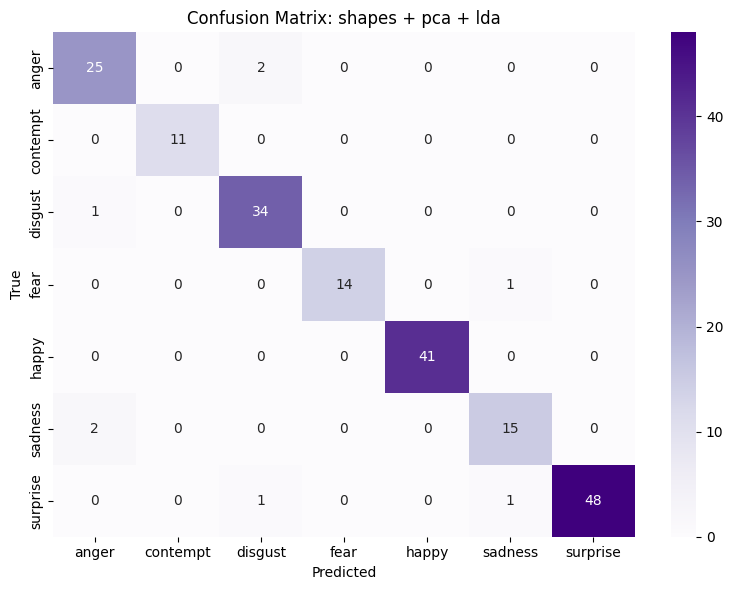


=== Summary of Logistic Regression with 3 Feature Sets ===
              Feature Combination  Training Accuracy  Testing Accuracy
1  valence_arousal + shapes + lda           0.994898          0.989796
0  valence_arousal + shapes + pca           1.000000          0.979592
3              shapes + pca + lda           1.000000          0.959184
2     valence_arousal + pca + lda           0.997449          0.913265


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Store results ===
results = []

# === Step 3: Try all 3-feature combinations ===
for name_combo in combinations(csv_files.keys(), 3):
    combo_name = ' + '.join(name_combo)
    print(f"\n=== Running Logistic Regression for combination: {combo_name.upper()} ===")

    # Load 3 selected CSVs
    dfs = [pd.read_csv(csv_files[name]) for name in name_combo]

    # Drop irrelevant columns
    drop_cols = ['image_name', 'filename', 'img_name']
    for i in range(len(dfs)):
        for col in drop_cols:
            if col in dfs[i].columns:
                dfs[i] = dfs[i].drop(columns=[col])

    # Detect and extract label
    label_column = None
    y = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for df in dfs:
        for col in possible_label_names:
            if col in df.columns:
                y = df[col]
                df.drop(columns=[col], inplace=True)
                label_column = col
                break
        if y is not None:
            break

    if y is None:
        raise Exception(f"Label column not found. Tried: {possible_label_names}")

    # Encode string labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge features and retain numeric columns
    X = pd.concat(dfs, axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Train Logistic Regression
    logreg = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
    logreg.fit(X_train, y_train)

    # Predictions
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Purples')
    plt.title(f'Confusion Matrix: {combo_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Store result
    results.append({
        'Feature Combination': combo_name,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Final Summary Table ===
print("\n=== Summary of Logistic Regression with 3 Feature Sets ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running Random Forest for combination: VALENCE_AROUSAL + SHAPES + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9489795918367347
Classification Report:
               precision    recall  f1-score   support

       anger       0.86      0.89      0.87        27
    contempt       1.00      1.00      1.00        11
     disgust       0.91      0.89      0.90        35
        fear       1.00      1.00      1.00        15
       happy       0.93      1.00      0.96        41
     sadness       1.00      0.82      0.90        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.95       196
   macro avg       0.96      0.94      0.95       196
weighted avg       0.95      0.95      0.95       196



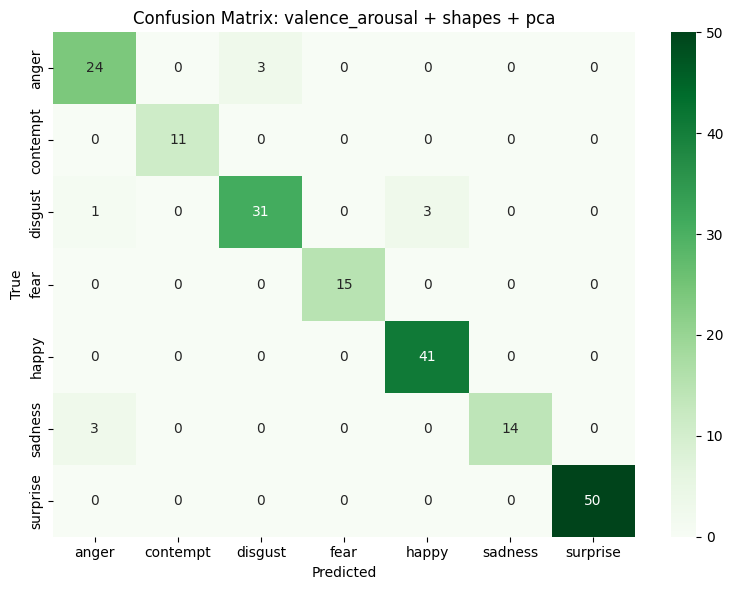


=== Running Random Forest for combination: VALENCE_AROUSAL + SHAPES + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9693877551020408
Classification Report:
               precision    recall  f1-score   support

       anger       0.90      1.00      0.95        27
    contempt       1.00      1.00      1.00        11
     disgust       1.00      0.89      0.94        35
        fear       1.00      1.00      1.00        15
       happy       0.93      1.00      0.96        41
     sadness       1.00      0.88      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       196
   macro avg       0.98      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



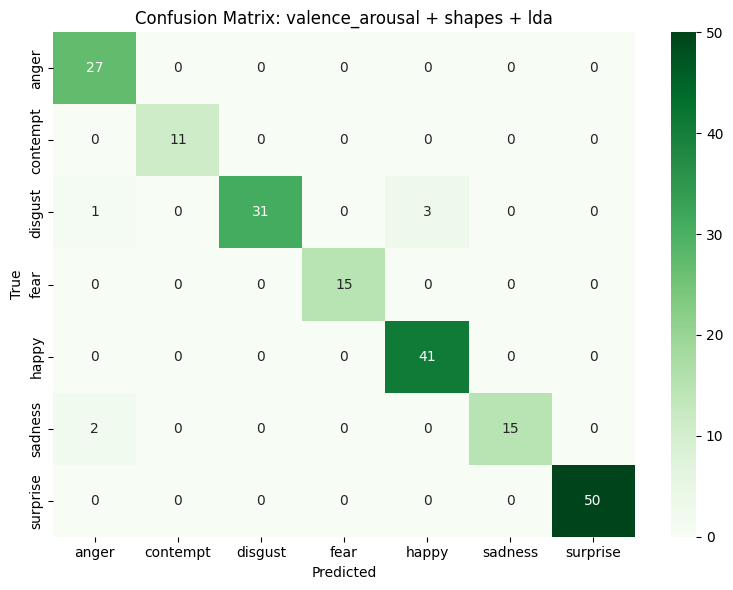


=== Running Random Forest for combination: VALENCE_AROUSAL + PCA + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9489795918367347
Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.85      0.85        27
    contempt       1.00      1.00      1.00        11
     disgust       0.92      0.97      0.94        35
        fear       1.00      0.93      0.97        15
       happy       0.98      1.00      0.99        41
     sadness       1.00      0.76      0.87        17
    surprise       0.96      1.00      0.98        50

    accuracy                           0.95       196
   macro avg       0.96      0.93      0.94       196
weighted avg       0.95      0.95      0.95       196



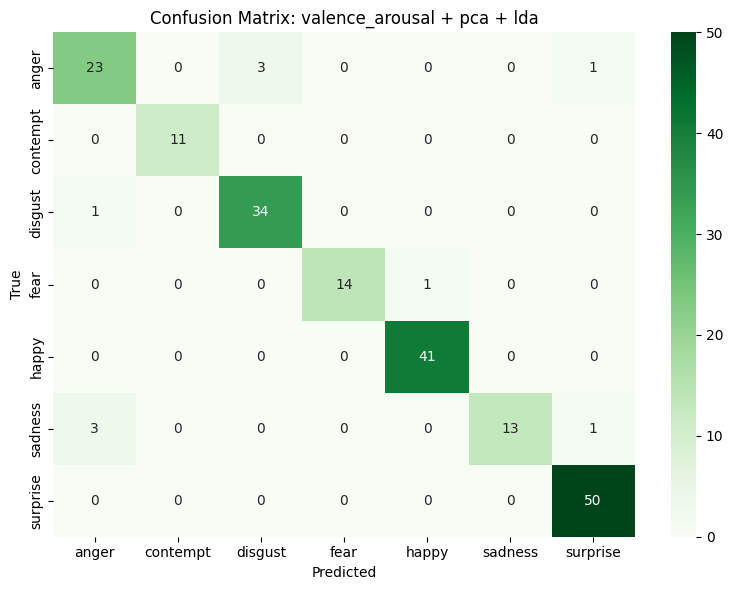


=== Running Random Forest for combination: SHAPES + PCA + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9693877551020408
Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.89      0.91        27
    contempt       1.00      1.00      1.00        11
     disgust       0.92      1.00      0.96        35
        fear       1.00      0.93      0.97        15
       happy       0.98      1.00      0.99        41
     sadness       1.00      0.88      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       196
   macro avg       0.97      0.96      0.97       196
weighted avg       0.97      0.97      0.97       196



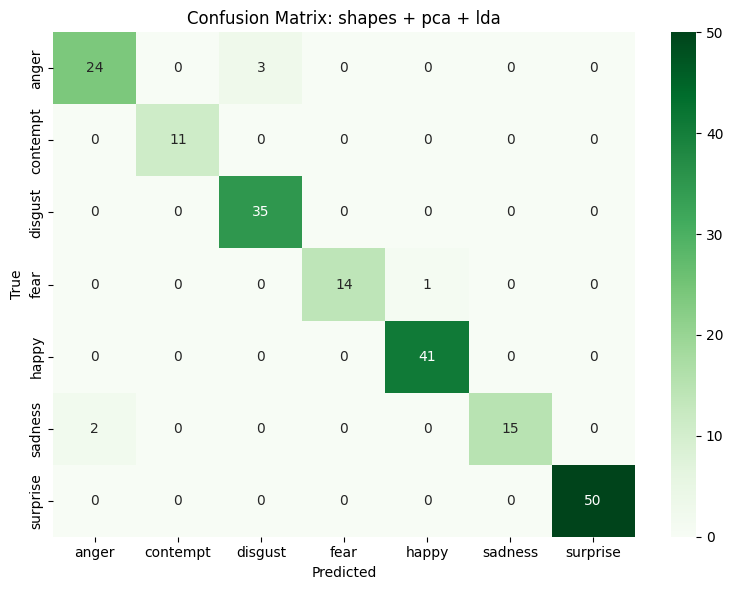


=== Summary of Random Forest with 3 Feature Sets ===
              Feature Combination  Training Accuracy  Testing Accuracy
1  valence_arousal + shapes + lda                1.0          0.969388
3              shapes + pca + lda                1.0          0.969388
0  valence_arousal + shapes + pca                1.0          0.948980
2     valence_arousal + pca + lda                1.0          0.948980


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Store results ===
results = []

# === Step 3: Loop over all 3-feature combinations ===
for name_combo in combinations(csv_files.keys(), 3):
    combo_name = ' + '.join(name_combo)
    print(f"\n=== Running Random Forest for combination: {combo_name.upper()} ===")

    # Load selected 3 CSVs
    dfs = [pd.read_csv(csv_files[name]) for name in name_combo]

    # Drop irrelevant columns
    drop_cols = ['image_name', 'filename', 'img_name']
    for i in range(len(dfs)):
        for col in drop_cols:
            if col in dfs[i].columns:
                dfs[i] = dfs[i].drop(columns=[col])

    # Detect and extract label
    label_column = None
    y = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for df in dfs:
        for col in possible_label_names:
            if col in df.columns:
                y = df[col]
                df.drop(columns=[col], inplace=True)
                label_column = col
                break
        if y is not None:
            break

    if y is None:
        raise Exception(f"Label column not found. Tried: {possible_label_names}")

    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge numeric features
    X = pd.concat(dfs, axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
    plt.title(f'Confusion Matrix: {combo_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Save result
    results.append({
        'Feature Combination': combo_name,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Final Summary Table ===
print("\n=== Summary of Random Forest with 3 Feature Sets ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))



=== Running MLPClassifier for combination: VALENCE_AROUSAL + SHAPES + PCA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9744897959183674
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.96      0.95        27
    contempt       1.00      1.00      1.00        11
     disgust       0.97      0.97      0.97        35
        fear       1.00      0.87      0.93        15
       happy       0.98      1.00      0.99        41
     sadness       0.94      0.94      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       196
   macro avg       0.97      0.96      0.97       196
weighted avg       0.97      0.97      0.97       196



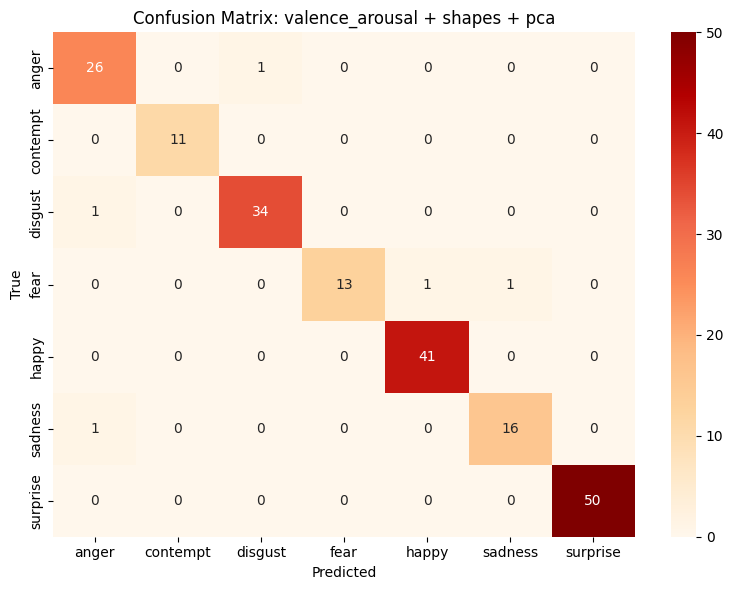


=== Running MLPClassifier for combination: VALENCE_AROUSAL + SHAPES + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9948979591836735
Classification Report:
               precision    recall  f1-score   support

       anger       0.96      1.00      0.98        27
    contempt       1.00      1.00      1.00        11
     disgust       1.00      1.00      1.00        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       1.00      0.94      0.97        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       1.00      0.99      0.99       196



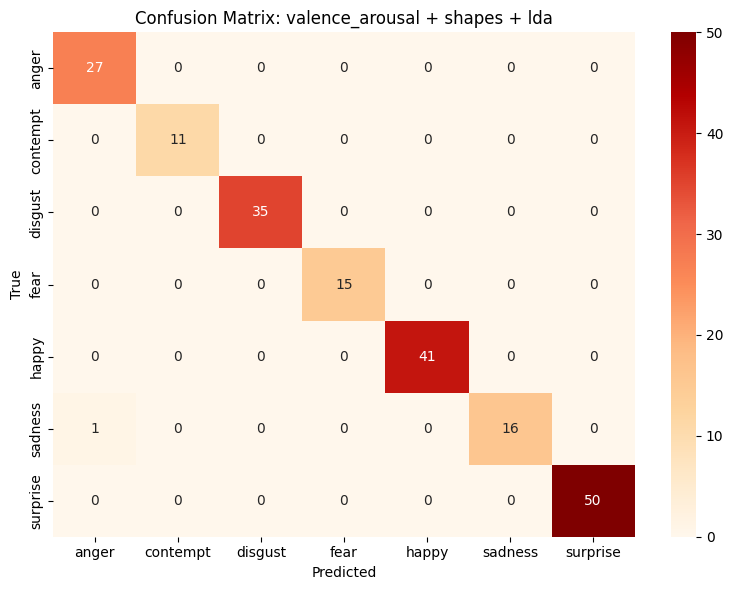


=== Running MLPClassifier for combination: VALENCE_AROUSAL + PCA + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.923469387755102
Classification Report:
               precision    recall  f1-score   support

       anger       0.95      0.74      0.83        27
    contempt       1.00      0.91      0.95        11
     disgust       0.85      0.97      0.91        35
        fear       0.93      0.87      0.90        15
       happy       0.95      1.00      0.98        41
     sadness       0.78      0.82      0.80        17
    surprise       0.98      0.98      0.98        50

    accuracy                           0.92       196
   macro avg       0.92      0.90      0.91       196
weighted avg       0.93      0.92      0.92       196



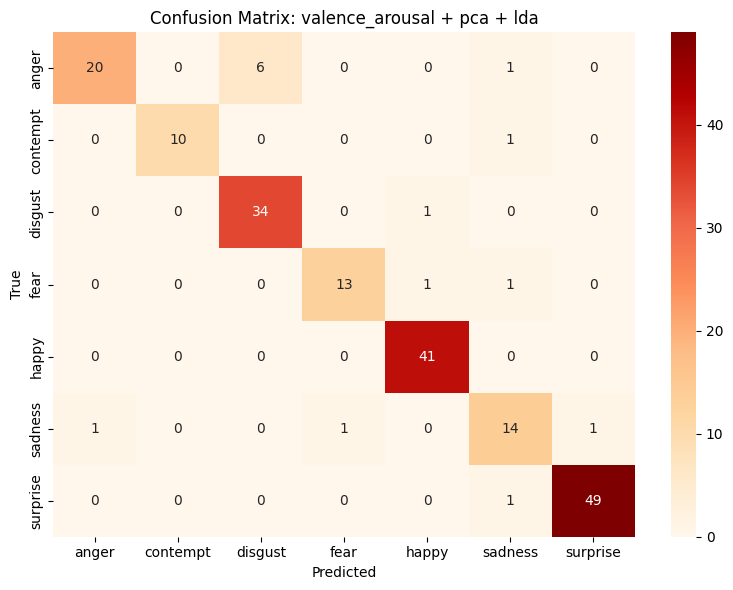


=== Running MLPClassifier for combination: SHAPES + PCA + LDA ===
Training Accuracy: 1.0
Testing Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.93      0.91        27
    contempt       1.00      0.91      0.95        11
     disgust       0.94      0.97      0.96        35
        fear       1.00      0.93      0.97        15
       happy       1.00      1.00      1.00        41
     sadness       0.88      0.88      0.88        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.96       196
   macro avg       0.96      0.95      0.95       196
weighted avg       0.97      0.96      0.96       196



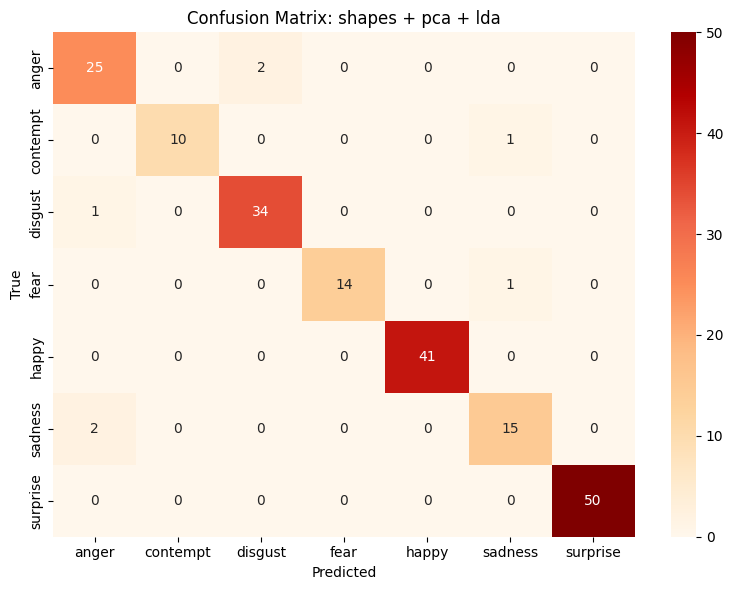


=== Summary of MLPClassifier with 3 Feature Sets ===
              Feature Combination  Training Accuracy  Testing Accuracy
1  valence_arousal + shapes + lda                1.0          0.994898
0  valence_arousal + shapes + pca                1.0          0.974490
3              shapes + pca + lda                1.0          0.964286
2     valence_arousal + pca + lda                1.0          0.923469


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Define CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Store results ===
results = []

# === Step 3: Loop through all 3-feature combinations ===
for name_combo in combinations(csv_files.keys(), 3):
    combo_name = ' + '.join(name_combo)
    print(f"\n=== Running MLPClassifier for combination: {combo_name.upper()} ===")

    # Load the three CSVs
    dfs = [pd.read_csv(csv_files[name]) for name in name_combo]

    # Drop irrelevant columns
    drop_cols = ['image_name', 'filename', 'img_name']
    for i in range(len(dfs)):
        for col in drop_cols:
            if col in dfs[i].columns:
                dfs[i] = dfs[i].drop(columns=[col])

    # Detect and extract label
    label_column = None
    y = None
    possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
    for df in dfs:
        for col in possible_label_names:
            if col in df.columns:
                y = df[col]
                df.drop(columns=[col], inplace=True)
                label_column = col
                break
        if y is not None:
            break

    if y is None:
        raise Exception(f"Label column not found. Tried: {possible_label_names}")

    # Encode emotion labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Merge features and retain only numeric values
    X = pd.concat(dfs, axis=1)
    X = X.select_dtypes(include=[np.number])

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # MLP Neural Network
    mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    mlp.fit(X_train, y_train)

    # Predict
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='OrRd')
    plt.title(f'Confusion Matrix: {combo_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Save result
    results.append({
        'Feature Combination': combo_name,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# === Final Summary Table ===
print("\n=== Summary of MLPClassifier with 3 Feature Sets ===")
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by='Testing Accuracy', ascending=False))


**          4 OUT OF 4 FEATURES         **


=== KNN Results (All 4 Features) ===
Training Accuracy: 0.9387755102040817
Testing Accuracy: 0.7908163265306123
Classification Report:
               precision    recall  f1-score   support

       anger       0.62      0.56      0.59        27
    contempt       0.69      0.82      0.75        11
     disgust       0.76      0.80      0.78        35
        fear       0.90      0.60      0.72        15
       happy       0.91      0.95      0.93        41
     sadness       0.44      0.41      0.42        17
    surprise       0.91      0.96      0.93        50

    accuracy                           0.79       196
   macro avg       0.75      0.73      0.73       196
weighted avg       0.79      0.79      0.79       196



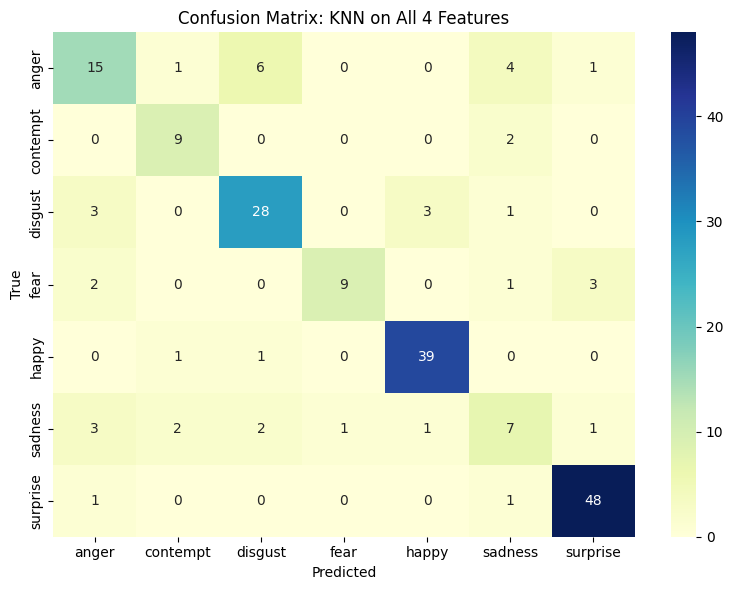

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Load all 4 CSVs ===
dfs = [pd.read_csv(path) for path in csv_files.values()]

# === Step 3: Clean and merge ===
drop_cols = ['image_name', 'filename', 'img_name']
for i in range(len(dfs)):
    for col in drop_cols:
        if col in dfs[i].columns:
            dfs[i] = dfs[i].drop(columns=[col])

# === Step 4: Detect and extract label column ===
label_column = None
y = None
possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
for df in dfs:
    for col in possible_label_names:
        if col in df.columns:
            y = df[col]
            df.drop(columns=[col], inplace=True)
            label_column = col
            break
    if y is not None:
        break

if y is None:
    raise Exception(f"Label column not found. Tried: {possible_label_names}")

# === Step 5: Label encoding ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Step 6: Merge all features ===
X = pd.concat(dfs, axis=1)
X = X.select_dtypes(include=[np.number])

# === Step 7: Normalize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 8: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Step 9: KNN model ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# === Step 10: Predictions and evaluation ===
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== KNN Results (All 4 Features) ===")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

# === Step 11: Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='YlGnBu')
plt.title('Confusion Matrix: KNN on All 4 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()



=== SVC Results (All 4 Features) ===
Training Accuracy: 0.9923469387755102
Testing Accuracy: 0.9387755102040817
Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.85      0.85        27
    contempt       1.00      1.00      1.00        11
     disgust       0.91      0.89      0.90        35
        fear       1.00      0.93      0.97        15
       happy       0.91      1.00      0.95        41
     sadness       0.93      0.82      0.88        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.94       196
   macro avg       0.94      0.93      0.93       196
weighted avg       0.94      0.94      0.94       196



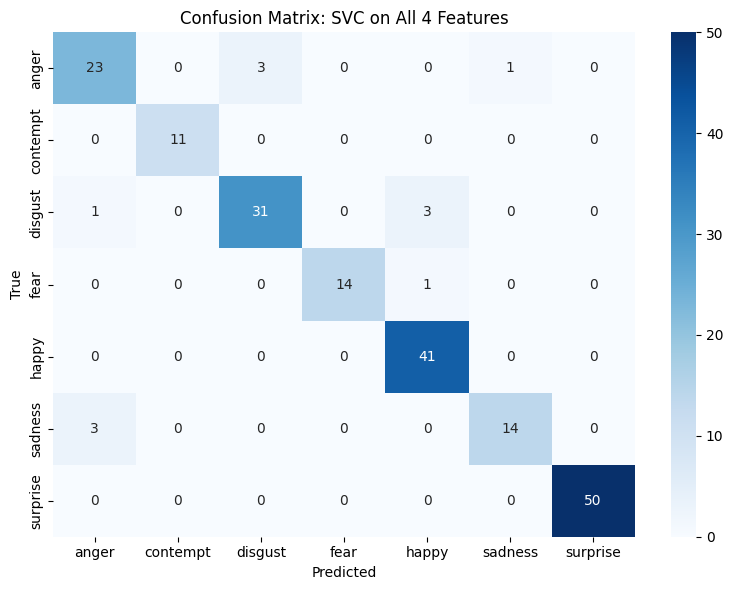

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Load all CSVs ===
dfs = [pd.read_csv(path) for path in csv_files.values()]

# === Step 3: Clean and drop irrelevant columns ===
drop_cols = ['image_name', 'filename', 'img_name']
for i in range(len(dfs)):
    for col in drop_cols:
        if col in dfs[i].columns:
            dfs[i] = dfs[i].drop(columns=[col])

# === Step 4: Detect and extract labels ===
label_column = None
y = None
possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
for df in dfs:
    for col in possible_label_names:
        if col in df.columns:
            y = df[col]
            df.drop(columns=[col], inplace=True)
            label_column = col
            break
    if y is not None:
        break

if y is None:
    raise Exception(f"Label column not found. Tried: {possible_label_names}")

# === Step 5: Label encode emotion categories ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Step 6: Merge all feature sets (numeric only) ===
X = pd.concat(dfs, axis=1)
X = X.select_dtypes(include=[np.number])

# === Step 7: Normalize the features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 8: Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Step 9: Train SVC ===
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

# === Step 10: Predictions ===
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# === Step 11: Accuracy ===
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== SVC Results (All 4 Features) ===")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

# === Step 12: Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix: SVC on All 4 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression Results (All 4 Features) ===
Training Accuracy: 1.0
Testing Accuracy: 0.9744897959183674
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.93      0.93        27
    contempt       0.92      1.00      0.96        11
     disgust       0.94      0.97      0.96        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       1.00      0.88      0.94        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.98      0.97      0.97       196



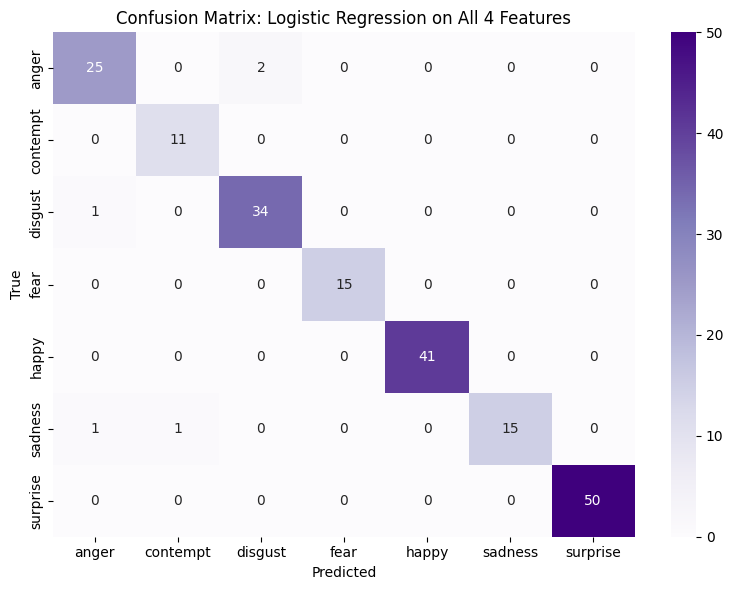

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Load CSVs ===
dfs = [pd.read_csv(path) for path in csv_files.values()]

# === Step 3: Clean unnecessary columns ===
drop_cols = ['image_name', 'filename', 'img_name']
for i in range(len(dfs)):
    for col in drop_cols:
        if col in dfs[i].columns:
            dfs[i] = dfs[i].drop(columns=[col])

# === Step 4: Detect label column ===
label_column = None
y = None
possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
for df in dfs:
    for col in possible_label_names:
        if col in df.columns:
            y = df[col]
            df.drop(columns=[col], inplace=True)
            label_column = col
            break
    if y is not None:
        break

if y is None:
    raise Exception(f"Label column not found. Tried: {possible_label_names}")

# === Step 5: Label encode classes ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Step 6: Merge features ===
X = pd.concat(dfs, axis=1)
X = X.select_dtypes(include=[np.number])

# === Step 7: Normalize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 8: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Step 9: Train Logistic Regression ===
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train, y_train)

# === Step 10: Predictions ===
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# === Step 11: Accuracy and Report ===
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== Logistic Regression Results (All 4 Features) ===")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

# === Step 12: Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Purples')
plt.title('Confusion Matrix: Logistic Regression on All 4 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()



=== Random Forest Results (All 4 Features) ===
Training Accuracy: 1.0
Testing Accuracy: 0.9540816326530612
Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.96      0.91        27
    contempt       1.00      1.00      1.00        11
     disgust       0.97      0.89      0.93        35
        fear       1.00      0.93      0.97        15
       happy       0.91      1.00      0.95        41
     sadness       1.00      0.82      0.90        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.95       196
   macro avg       0.96      0.94      0.95       196
weighted avg       0.96      0.95      0.95       196



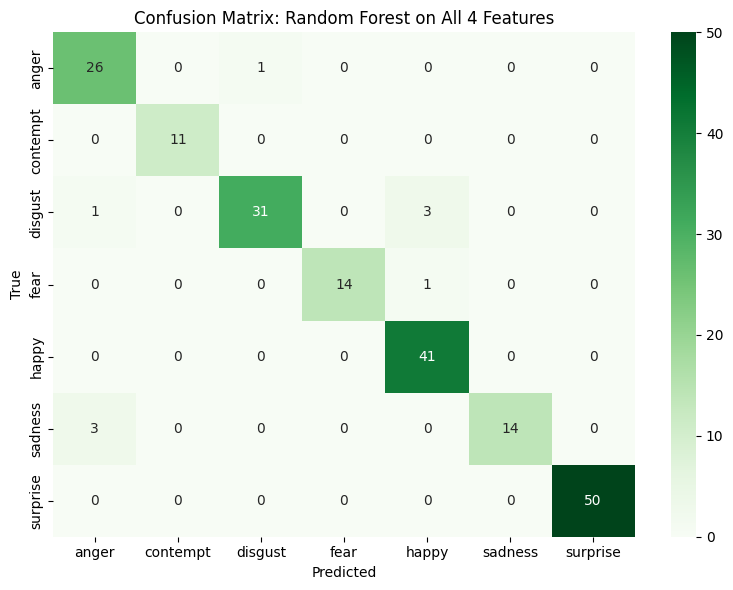

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Load the CSVs ===
dfs = [pd.read_csv(path) for path in csv_files.values()]

# === Step 3: Clean unnecessary columns ===
drop_cols = ['image_name', 'filename', 'img_name']
for i in range(len(dfs)):
    for col in drop_cols:
        if col in dfs[i].columns:
            dfs[i] = dfs[i].drop(columns=[col])

# === Step 4: Detect and extract the label column ===
label_column = None
y = None
possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
for df in dfs:
    for col in possible_label_names:
        if col in df.columns:
            y = df[col]
            df.drop(columns=[col], inplace=True)
            label_column = col
            break
    if y is not None:
        break

if y is None:
    raise Exception(f"Label column not found. Tried: {possible_label_names}")

# === Step 5: Encode the labels ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Step 6: Merge all features (numeric only) ===
X = pd.concat(dfs, axis=1)
X = X.select_dtypes(include=[np.number])

# === Step 7: Normalize features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 8: Split the data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Step 9: Train Random Forest model ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === Step 10: Make predictions ===
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# === Step 11: Accuracy and Report ===
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== Random Forest Results (All 4 Features) ===")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

# === Step 12: Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.title('Confusion Matrix: Random Forest on All 4 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()



=== MLP Classifier Results (All 4 Features) ===
Training Accuracy: 1.0
Testing Accuracy: 0.9540816326530612
Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.85      0.87        27
    contempt       1.00      1.00      1.00        11
     disgust       0.89      0.97      0.93        35
        fear       1.00      0.87      0.93        15
       happy       0.98      1.00      0.99        41
     sadness       0.94      0.88      0.91        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.95       196
   macro avg       0.96      0.94      0.95       196
weighted avg       0.95      0.95      0.95       196



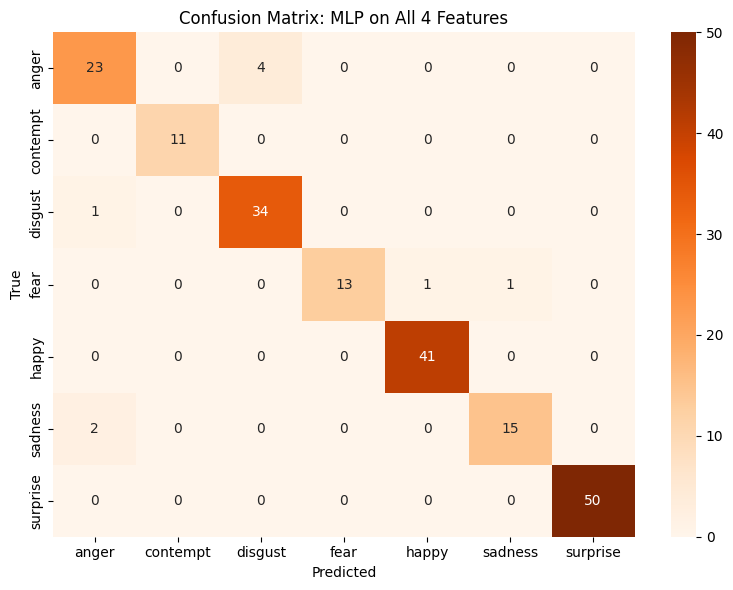

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: CSV file paths ===
csv_files = {
    'valence_arousal': 'processed_faces_newFinal5/valence_arousal_vectors_normalized.csv',
    'shapes': 'processed_faces_newFinal8_1/facial_shapes_drawn_features_only.csv',
    'pca': 'processed_faces_newFinal9/eigenface_analysis_results/eigenface_features.csv',
    'lda': 'processed_faces_newFinal9/lda_analysis_results/lda_features.csv'
}

# === Step 2: Load CSVs ===
dfs = [pd.read_csv(path) for path in csv_files.values()]

# === Step 3: Drop unnecessary columns ===
drop_cols = ['image_name', 'filename', 'img_name']
for i in range(len(dfs)):
    for col in drop_cols:
        if col in dfs[i].columns:
            dfs[i] = dfs[i].drop(columns=[col])

# === Step 4: Detect and extract label column ===
label_column = None
y = None
possible_label_names = ['label', 'emotion', 'class', 'Category', 'target']
for df in dfs:
    for col in possible_label_names:
        if col in df.columns:
            y = df[col]
            df.drop(columns=[col], inplace=True)
            label_column = col
            break
    if y is not None:
        break

if y is None:
    raise Exception(f"Label column not found. Tried: {possible_label_names}")

# === Step 5: Encode labels ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Step 6: Merge and normalize numeric features ===
X = pd.concat(dfs, axis=1)
X = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 7: Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Step 8: MLPClassifier (Neural Net) ===
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, y_train)

# === Step 9: Predictions ===
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# === Step 10: Accuracy and Report ===
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== MLP Classifier Results (All 4 Features) ===")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))

# === Step 11: Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Oranges')
plt.title('Confusion Matrix: MLP on All 4 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
